# King County Home Price Analysis

## Overview

This project focuses on predicting the housing price with various factors affecting the price. It involves in investigating house sales in the King County area and building a multiple linear regression model to predict the sale price.

## Business Problem

A client in King County, WA wants to advise homeowners on home improvement projects that will add to the sale value of their homes. My goal is to build a linear regression model to represent home sale prices in King County, and use it to advise homeowners on which home improvement projects will add to their home sale values.

### Importing Data and Packages

In [1]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor



Four csv files are given for the model analysis and i'm converting those csv files into the data frame.

In [2]:
#Converting csv file and load the dataframe.

parcel = pd.read_csv("../../data/raw/EXTR_Parcel.csv", dtype=str)
resbldg = pd.read_csv("../../data/raw/EXTR_ResBldg.csv", dtype=str)
rpsale = pd.read_csv("../../data/raw/EXTR_RPSale.csv", dtype=str)
lookup = pd.read_csv("../../data/raw/EXTR_LookUp.csv", dtype=str)

Now check for the shape of the dataframe and first five rows of the dataframe.

In [3]:
#Checking number of rows and columns
print(parcel.shape)
parcel.head()

(205199, 82)


,Unnamed: 0,Major,Minor,PropName,PlatName,PlatLot,PlatBlock,Range,Township,Section,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,0,807841,0410,,SUMMER RIDGE DIV NO. 02,41,,6,25,22,...,N,N,N,N,N,N,N,N,N,N
1,2,755080,0015,,SANDER'S TO GILMAN PK & SALMON BAY,3,1,3,25,11,...,N,N,N,N,N,N,N,N,N,N
2,3,888600,0135,,VASHON GARDENS ADD,21,,3,22,8,...,N,N,N,N,N,N,N,N,N,N
3,6,022603,9181,,NaN,,,3,26,2,...,N,N,N,N,N,N,N,N,N,N
4,7,229670,0160,,ELDORADO NORTH,16,,5,26,19,...,N,N,N,N,N,N,N,N,N,N


Now i'm checking all the columns from parcel dataframe table

In [4]:
#check for parcel dataframe columns
parcel.columns

Index(['Unnamed: 0', 'Major', 'Minor', 'PropName', 'PlatName', 'PlatLot',
       'PlatBlock', 'Range', 'Township', 'Section', 'QuarterSection',
       'PropType', 'Area', 'SubArea', 'SpecArea', 'SpecSubArea',
       'DistrictName', 'LevyCode', 'CurrentZoning', 'HBUAsIfVacant',
       'HBUAsImproved', 'PresentUse', 'SqFtLot', 'WaterSystem', 'SewerSystem',
       'Access', 'Topography', 'StreetSurface', 'RestrictiveSzShape',
       'InadequateParking', 'PcntUnusable', 'Unbuildable', 'MtRainier',
       'Olympics', 'Cascades', 'Territorial', 'SeattleSkyline', 'PugetSound',
       'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek', 'OtherView',
       'WfntLocation', 'WfntFootage', 'WfntBank', 'WfntPoorQuality',
       'WfntRestrictedAccess', 'WfntAccessRights', 'WfntProximityInfluence',
       'TidelandShoreland', 'LotDepthFactor', 'TrafficNoise', 'AirportNoise',
       'PowerLines', 'OtherNuisances', 'NbrBldgSites', 'Contamination',
       'DNRLease', 'AdjacentGolfFairway', 'Adjace

In [5]:
#check the info 
parcel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205199 entries, 0 to 205198
Data columns (total 82 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Unnamed: 0              205199 non-null  object
 1   Major                   205199 non-null  object
 2   Minor                   205199 non-null  object
 3   PropName                196088 non-null  object
 4   PlatName                176654 non-null  object
 5   PlatLot                 205199 non-null  object
 6   PlatBlock               205199 non-null  object
 7   Range                   205199 non-null  object
 8   Township                205199 non-null  object
 9   Section                 205199 non-null  object
 10  QuarterSection          205199 non-null  object
 11  PropType                205199 non-null  object
 12  Area                    205193 non-null  object
 13  SubArea                 205193 non-null  object
 14  SpecArea                4864 non-nul

check for the number of null values in each column of the dataframe and sort the values in descending order. 

In [6]:
#check the null vaules
parcel.isna().sum().sort_values(ascending=False)[:10]

SpecSubArea      200335
SpecArea         200335
PlatName          28545
PropName           9111
Area                  6
SubArea               6
OtherProblems         0
Access                0
Topography            0
StreetSurface         0
dtype: int64

In the parcel table there is a unnamed:0 column, i'm dropping it. From the above fndings i'm dropping 'SpecArea', 'SpecSubArea','PlatName','PropName','SubArea','Area' since they have null values which might affect the analysis later. 

In [7]:
# dropping few null value columns
parcel.drop(['Unnamed: 0','SpecArea', 'SpecSubArea','PlatName','PropName','SubArea','Area'], axis=1, inplace=True)

In [8]:
parcel.head()

,Major,Minor,PlatLot,PlatBlock,Range,Township,Section,QuarterSection,PropType,DistrictName,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,807841,0410,41,,6,25,22,SW,R,SAMMAMISH,...,N,N,N,N,N,N,N,N,N,N
1,755080,0015,3,1,3,25,11,NW,R,SEATTLE,...,N,N,N,N,N,N,N,N,N,N
2,888600,0135,21,,3,22,8,NE,R,KING COUNTY,...,N,N,N,N,N,N,N,N,N,N
3,022603,9181,,,3,26,2,NW,R,SHORELINE,...,N,N,N,N,N,N,N,N,N,N
4,229670,0160,16,,5,26,19,SW,R,KIRKLAND,...,N,N,N,N,N,N,N,N,N,N


In [9]:
#checking the shape and rows for resbldg dataframe.
print(resbldg.shape)
resbldg.head()

(181510, 50)


,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,009800,0720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,009802,0140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0
2,009830,0020,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,0,2017,0,0,0,0,3,0
3,009830,0160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,0,2013,0,0,0,0,3,0
4,010050,0180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0


In [10]:
#check the list of columns in resbldg
resbldg.columns

Index(['Major', 'Minor', 'BldgNbr', 'NbrLivingUnits', 'Address',
       'BuildingNumber', 'Fraction', 'DirectionPrefix', 'StreetName',
       'StreetType', 'DirectionSuffix', 'ZipCode', 'Stories', 'BldgGrade',
       'BldgGradeVar', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor',
       'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving',
       'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade',
       'SqFtGarageBasement', 'SqFtGarageAttached', 'DaylightBasement',
       'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'HeatSystem',
       'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'FpAdditional', 'YrBuilt',
       'YrRenovated', 'PcntComplete', 'Obsolescence', 'PcntNetCondition',
       'Condition', 'AddnlCost'],
      dtype='object')

In [11]:
resbldg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181510 entries, 0 to 181509
Data columns (total 50 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   Major               181510 non-null  object
 1   Minor               181510 non-null  object
 2   BldgNbr             181510 non-null  object
 3   NbrLivingUnits      181510 non-null  object
 4   Address             181510 non-null  object
 5   BuildingNumber      181510 non-null  object
 6   Fraction            181510 non-null  object
 7   DirectionPrefix     181146 non-null  object
 8   StreetName          181510 non-null  object
 9   StreetType          181510 non-null  object
 10  DirectionSuffix     181146 non-null  object
 11  ZipCode             154594 non-null  object
 12  Stories             181510 non-null  object
 13  BldgGrade           181510 non-null  object
 14  BldgGradeVar        181510 non-null  object
 15  SqFt1stFloor        181510 non-null  object
 16  Sq

In [12]:
resbldg.Address.unique()

array(['27719  SE 26TH WAY   98075', '2829   277TH TER SE  98075',
       '1715   298TH CRESENT  SE  ', ..., '11 B W DRAVUS ST   ',
       '11 C W DRAVUS ST   ', '100 B  FLORENTIA ST   '], dtype=object)

In [13]:
#check the null values in resbldg
resbldg.isna().sum().sort_values(ascending=False)[:10]

ZipCode            26916
DirectionPrefix      364
DirectionSuffix      364
BldgGrade              0
SqFtTotBasement        0
SqFtTotLiving          0
SqFtUnfinHalf          0
SqFtUnfinFull          0
SqFtUpperFloor         0
SqFt2ndFloor           0
dtype: int64

In [14]:
#check the shape and rows for rpsale dataframe
print(rpsale.shape)
rpsale.head()

(351067, 24)


,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,Volume,Page,PlatNbr,PlatType,...,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2857854,198920,1430,03/28/2017,0,20170410000541,,,,,...,3,7,15,N,N,N,N,16,2,20 31
1,2743355,638580,0110,07/14/2015,190000,20150715002686,,,,,...,3,6,3,N,N,N,N,1,8,15
2,2999169,919715,0200,07/08/2019,192000,20190712001080,,,,,...,3,2,3,N,N,N,N,1,3,
3,2841697,894677,0240,12/21/2016,818161,20161228000896,,,,,...,2,6,3,N,N,N,N,1,8,
4,2826129,445872,0260,10/03/2016,0,20161004000511,,,,,...,3,2,15,N,N,N,N,18,3,18 31


Now i'm checking the list of columns present in rpsale dataframe table.

In [15]:
#check the column index
rpsale.columns

Index(['ExciseTaxNbr', 'Major', 'Minor', 'DocumentDate', 'SalePrice',
       'RecordingNbr', 'Volume', 'Page', 'PlatNbr', 'PlatType', 'PlatLot',
       'PlatBlock', 'SellerName', 'BuyerName', 'PropertyType', 'PrincipalUse',
       'SaleInstrument', 'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse',
       'AFHistoricProperty', 'SaleReason', 'PropertyClass', 'SaleWarning'],
      dtype='object')

In [16]:
rpsale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351067 entries, 0 to 351066
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   ExciseTaxNbr        351067 non-null  object
 1   Major               351067 non-null  object
 2   Minor               351067 non-null  object
 3   DocumentDate        351067 non-null  object
 4   SalePrice           351067 non-null  object
 5   RecordingNbr        351067 non-null  object
 6   Volume              351067 non-null  object
 7   Page                351067 non-null  object
 8   PlatNbr             351067 non-null  object
 9   PlatType            351067 non-null  object
 10  PlatLot             351067 non-null  object
 11  PlatBlock           351067 non-null  object
 12  SellerName          351067 non-null  object
 13  BuyerName           351067 non-null  object
 14  PropertyType        351067 non-null  object
 15  PrincipalUse        351067 non-null  object
 16  Sa

In [17]:
#check the null values present in each column of rpsale dataframe.
rpsale.isna().sum()

ExciseTaxNbr          0
Major                 0
Minor                 0
DocumentDate          0
SalePrice             0
RecordingNbr          0
Volume                0
Page                  0
PlatNbr               0
PlatType              0
PlatLot               0
PlatBlock             0
SellerName            0
BuyerName             0
PropertyType          0
PrincipalUse          0
SaleInstrument        0
AFForestLand          0
AFCurrentUseLand      0
AFNonProfitUse        0
AFHistoricProperty    0
SaleReason            0
PropertyClass         0
SaleWarning           0
dtype: int64

There are empty columns with no values and i'm dropping those columns.

In [18]:
#dropping the empty columns
rpsale.drop(['Volume','Page','PlatNbr','PlatType','PlatLot','PlatBlock'], axis=1, inplace=True)

In [19]:
rpsale.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,AFCurrentUseLand,AFNonProfitUse,AFHistoricProperty,SaleReason,PropertyClass,SaleWarning
0,2857854,198920,1430,03/28/2017,0,20170410000541,AD APARTMENTS LLC ...,SEATTLE CITY OF ...,3,7,15,N,N,N,N,16,2,20 31
1,2743355,638580,0110,07/14/2015,190000,20150715002686,GINGRICH AUDREY B ...,NATION FRED I ...,3,6,3,N,N,N,N,1,8,15
2,2999169,919715,0200,07/08/2019,192000,20190712001080,WAGNERESTATES LLC ...,SCHAFFER CORBIN ...,3,2,3,N,N,N,N,1,3,
3,2841697,894677,0240,12/21/2016,818161,20161228000896,QUADRANT CORPORATION ...,KANG JING ...,2,6,3,N,N,N,N,1,8,
4,2826129,445872,0260,10/03/2016,0,20161004000511,MARCH CARL J + SUSAN A ...,MARCH CARL J + SUSAN A REVOCABLE LIVING TRUST ...,3,2,15,N,N,N,N,18,3,18 31


In [20]:
#Load the lookup table
lookup.head()

,LUType,LUItem,LUDescription
0,1,1,LAND ONLY ...
1,1,10,Land with new building ...
2,1,11,"Household, single family units ..."
3,1,12,"Multiple family residence (Residential, 2-4 un..."
4,1,13,"Multiple family residence (Residential, 5+ uni..."


In [21]:
lookup.LUType.values[:5]


array(['1  ', '1  ', '1  ', '1  ', '1  '], dtype=object)

In [22]:
lookup.LUItem.values[:5]


array(['1  ', '10 ', '11 ', '12 ', '13 '], dtype=object)

In [23]:
lookup.LUDescription.values[:5]

array(['LAND ONLY                                         ',
       'Land with new building                            ',
       'Household, single family units                    ',
       'Multiple family residence (Residential, 2-4 units)',
       'Multiple family residence (Residential, 5+ units) '], dtype=object)

In the lookup dataframe of LUType, LUItem and LUDescription there are some whitespaces,and i'm removing those whitespaces.

In [24]:
#Removing extraneous whitespace
lookup = lookup.applymap(lambda x: x.strip() if type(x) == str else x)

In [25]:
lookup[lookup.LUType == '2']

,LUType,LUItem,LUDescription
804,2,1,AGRICULTURAL
805,2,10,OTHER
806,2,11,COMMERCIAL/INDUSTRIAL
807,2,2,CONDOMINIUM
808,2,3,RECREATIONAL
809,2,4,APT(4+ UNITS)
810,2,5,INDUSTRIAL
811,2,6,RESIDENTIAL
812,2,7,COMMERCIAL
813,2,8,MOBILE HOME


In [26]:
lookup[lookup.LUItem == '2']

,LUType,LUItem,LUDescription
11,1,2,LAND WITH NEW BUILDING
139,102,2,Single Family(Res Use/Zone)
224,103,2,DUPLEX
235,104,2,INTERIM USE
240,106,2,Rect or Slight Irreg
...,...,...,...
1184,95,2,HIGH
1186,96,2,LOW COST
1194,97,2,REINFORCED CONCRETE
1199,98,2,BELOW AVERAGE


In [27]:
def lookup(df, lu_type, lu_item=None):
    """
    Return a dataframe from 'df_look' with 'LUType' == lu_type
    and 'LUItem' == lu_item (if specified)
    """
    if lu_item:
        return df[(df.LUType == str(lu_type)) & (df.LUItem == str(lu_item))]
    else:
        return df[(df.LUType == str(lu_type))]

## Initial Data Preparation

### Merging Datasets



To start with the data preparation, i'm merging the rpsale and parcel datasets with 'Major' & 'Minor column.

In [28]:
#merging the rpsale and parcel dataframe
sale_parcel = pd.merge(rpsale, parcel, on=['Major', 'Minor'] )
sale_parcel.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,...,SeismicHazard,LandslideHazard,SteepSlopeHazard,Stream,Wetland,SpeciesOfConcern,SensitiveAreaTract,WaterProblems,TranspConcurrency,OtherProblems
0,2857854,198920,1430,03/28/2017,0,20170410000541,AD APARTMENTS LLC ...,SEATTLE CITY OF ...,3,7,...,N,N,N,N,N,N,N,N,N,N
1,2843191,198920,1430,12/27/2016,0,20170105001317,AD APARTMENTS L L C ...,SEATTLE CITY OF ...,3,7,...,N,N,N,N,N,N,N,N,N,N
2,2868163,198920,1430,05/30/2017,0,20170601000550,AD APARTMENTS LLC ...,SEATTLE CITY OF ...,3,7,...,N,N,N,N,N,N,N,N,N,N
3,2788087,198920,1430,03/10/2016,14450000,20160401000319,DENNY PROPERTY LLC ...,AD APARTMENTS LLC ...,3,7,...,N,N,N,N,N,N,N,N,N,N
4,2743355,638580,0110,07/14/2015,190000,20150715002686,GINGRICH AUDREY B ...,NATION FRED I ...,3,6,...,N,N,N,N,N,N,N,N,N,N


In [29]:
#since resbldg was a list, converting it into dataframe.
pd.DataFrame(resbldg)

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,DirectionPrefix,StreetName,StreetType,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,009800,0720,1,1,27719 SE 26TH WAY 98075,27719,,SE,26TH,WAY,...,0,0,0,2001,0,0,0,0,3,0
1,009802,0140,1,1,2829 277TH TER SE 98075,2829,,,277TH,TER,...,0,0,0,2004,0,0,0,0,3,0
2,009830,0020,1,1,1715 298TH CRESENT SE,1715,,,298TH CRESENT,,...,0,0,0,2017,0,0,0,0,3,0
3,009830,0160,1,1,1861 297TH WAY SE 98024,1861,,,297TH,WAY,...,0,0,0,2013,0,0,0,0,3,0
4,010050,0180,1,1,35410 25TH PL S 98003,35410,,,25TH,PL,...,0,0,0,1994,0,0,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181505,197220,1902,1,1,3816 WINSLOW PL N 98103,3816,,,WINSLOW,PL,...,0,0,0,2003,0,0,0,0,3,0
181506,197220,2224,1,1,3841 B WOODLAND PARK AVE N 98103,3841,B,,WOODLAND PARK,AVE,...,0,0,0,2005,0,0,0,0,3,0
181507,197220,5172,1,1,11 B W DRAVUS ST,11,B,W,DRAVUS,ST,...,0,0,0,2007,0,0,0,0,3,0
181508,197220,5173,1,1,11 C W DRAVUS ST,11,C,W,DRAVUS,ST,...,0,0,0,2007,0,0,0,0,3,0


In [30]:
#dropping columns 'DirectionPrefix' & 'DirectionSuffix', 'ZipCode' from the dataset
resbldg.drop(['DirectionPrefix','DirectionSuffix','ZipCode'], axis=1, inplace=True)

In [31]:
resbldg.head()

,Major,Minor,BldgNbr,NbrLivingUnits,Address,BuildingNumber,Fraction,StreetName,StreetType,Stories,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,009800,0720,1,1,27719 SE 26TH WAY 98075,27719,,26TH,WAY,2,...,0,0,0,2001,0,0,0,0,3,0
1,009802,0140,1,1,2829 277TH TER SE 98075,2829,,277TH,TER,2,...,0,0,0,2004,0,0,0,0,3,0
2,009830,0020,1,1,1715 298TH CRESENT SE,1715,,298TH CRESENT,,2,...,0,0,0,2017,0,0,0,0,3,0
3,009830,0160,1,1,1861 297TH WAY SE 98024,1861,,297TH,WAY,2,...,0,0,0,2013,0,0,0,0,3,0
4,010050,0180,1,1,35410 25TH PL S 98003,35410,,25TH,PL,2,...,0,0,0,1994,0,0,0,0,4,0


Now mergigng the resbldg and sale_parcel datasets to the final dataframe 'df'.

In [32]:
#merging the resbldg and sale_parcel datasets
df = pd.merge(sale_parcel, resbldg, on=['Major', 'Minor'])
df.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,...,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost
0,2743355,638580,0110,07/14/2015,190000,20150715002686,GINGRICH AUDREY B ...,NATION FRED I ...,3,6,...,1,0,1,1963,0,0,0,0,3,0
1,2743356,638580,0110,07/14/2015,0,20150715002687,NATION CHRISTINE M ...,NATION FRED I ...,3,6,...,1,0,1,1963,0,0,0,0,3,0
2,2772937,638580,0110,12/21/2015,338000,20151222002066,NATION FRED I ...,SUNG NI HLEI+ZING ESTHER ZA+ZOTUNG ZAW MOE ...,3,6,...,1,0,1,1963,0,0,0,0,3,0
3,2841697,894677,0240,12/21/2016,818161,20161228000896,QUADRANT CORPORATION ...,KANG JING ...,2,6,...,0,0,0,2016,0,0,0,0,3,0
4,3024468,894677,0240,12/05/2019,0,20191209000162,KANG JING ...,KANG JING+XIAO XUAN ...,3,6,...,0,0,0,2016,0,0,0,0,3,0


Now i'm checking the shape of the dataframe and the list of columns present in the dataset.

In [33]:
print(df.shape)
list(df.columns)

(251300, 136)


['ExciseTaxNbr',
 'Major',
 'Minor',
 'DocumentDate',
 'SalePrice',
 'RecordingNbr',
 'SellerName',
 'BuyerName',
 'PropertyType',
 'PrincipalUse',
 'SaleInstrument',
 'AFForestLand',
 'AFCurrentUseLand',
 'AFNonProfitUse',
 'AFHistoricProperty',
 'SaleReason',
 'PropertyClass',
 'SaleWarning',
 'PlatLot',
 'PlatBlock',
 'Range',
 'Township',
 'Section',
 'QuarterSection',
 'PropType',
 'DistrictName',
 'LevyCode',
 'CurrentZoning',
 'HBUAsIfVacant',
 'HBUAsImproved',
 'PresentUse',
 'SqFtLot',
 'WaterSystem',
 'SewerSystem',
 'Access',
 'Topography',
 'StreetSurface',
 'RestrictiveSzShape',
 'InadequateParking',
 'PcntUnusable',
 'Unbuildable',
 'MtRainier',
 'Olympics',
 'Cascades',
 'Territorial',
 'SeattleSkyline',
 'PugetSound',
 'LakeWashington',
 'LakeSammamish',
 'SmallLakeRiverCreek',
 'OtherView',
 'WfntLocation',
 'WfntFootage',
 'WfntBank',
 'WfntPoorQuality',
 'WfntRestrictedAccess',
 'WfntAccessRights',
 'WfntProximityInfluence',
 'TidelandShoreland',
 'LotDepthFactor',
 

In [34]:
# check for the info details
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251300 entries, 0 to 251299
Columns: 136 entries, ExciseTaxNbr to AddnlCost
dtypes: object(136)
memory usage: 262.7+ MB


Now i'm changing the DocumentDate column to datatime object

In [35]:
# changing the date strings to datetime objects
df.DocumentDate = pd.to_datetime(df.DocumentDate)

Adding a new column called Year for my model analysis

In [36]:
# adding a year column
df['Year'] = df['DocumentDate'].apply(lambda x: x.year)

In [37]:
df.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Year
0,2743355,638580,0110,2015-07-14,190000,20150715002686,GINGRICH AUDREY B ...,NATION FRED I ...,3,6,...,0,1,1963,0,0,0,0,3,0,2015
1,2743356,638580,0110,2015-07-14,0,20150715002687,NATION CHRISTINE M ...,NATION FRED I ...,3,6,...,0,1,1963,0,0,0,0,3,0,2015
2,2772937,638580,0110,2015-12-21,338000,20151222002066,NATION FRED I ...,SUNG NI HLEI+ZING ESTHER ZA+ZOTUNG ZAW MOE ...,3,6,...,0,1,1963,0,0,0,0,3,0,2015
3,2841697,894677,0240,2016-12-21,818161,20161228000896,QUADRANT CORPORATION ...,KANG JING ...,2,6,...,0,0,2016,0,0,0,0,3,0,2016
4,3024468,894677,0240,2019-12-05,0,20191209000162,KANG JING ...,KANG JING+XIAO XUAN ...,3,6,...,0,0,2016,0,0,0,0,3,0,2019


seggregating only the 2019 year from the Year column. 

In [38]:
#Keeping the year == 2019
df = df[df.Year == 2019]

In [39]:
df.head()

,ExciseTaxNbr,Major,Minor,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,...,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Year
4,3024468,894677,0240,2019-12-05,0,20191209000162,KANG JING ...,KANG JING+XIAO XUAN ...,3,6,...,0,0,2016,0,0,0,0,3,0,2019
5,3024469,894677,0240,2019-12-05,0,20191209000163,KANG JING ...,KANG JING+XIAO XUAN ...,3,6,...,0,0,2016,0,0,0,0,3,0,2019
11,3027422,213043,0120,2019-12-20,560000,20191226000848,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,...,0,0,1989,0,0,0,0,3,0,2019
12,3002257,940652,0630,2019-07-22,435000,20190730001339,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,...,0,0,1994,0,0,0,0,3,2500,2019
22,2993601,140281,0020,2019-06-04,450000,20190614000489,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,...,0,0,1986,0,0,0,0,3,0,2019


In [40]:
#changing my SalePrice datatype as int
df.SalePrice = df.SalePrice.astype(int)

In [41]:
# Dropping  SalePrice <= 0
df = df[df.SalePrice > 0]

In [42]:
#checking for the saleprice value counts
df.SalePrice.value_counts()

450000     232
650000     228
700000     207
400000     205
550000     200
          ... 
556070       1
420900       1
123925       1
1248248      1
665725       1
Name: SalePrice, Length: 5550, dtype: int64

Im combining both the Major column and Minor column into a single column as 'MM'.

In [43]:
#combining major column and minor column into 'MM'
df['MM'] = df['Major'] + df['Minor']

In [44]:
# dropping Major & Minor columns
df.drop(['Major', 'Minor'], axis=1, inplace=True)

In [45]:
df.head()

,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,...,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Year,MM
11,3027422,2019-12-20,560000,20191226000848,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,...,0,1989,0,0,0,0,3,0,2019,2130430120
12,3002257,2019-07-22,435000,20190730001339,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,...,0,1994,0,0,0,0,3,2500,2019,9406520630
22,2993601,2019-06-04,450000,20190614000489,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,...,0,1986,0,0,0,0,3,0,2019,1402810020
29,3002772,2019-07-26,812000,20190801000556,PERRY ROBERT JAMES ...,PONISCHIL KARISSA ...,11,6,3,N,...,0,1947,0,0,0,0,5,0,2019,1750700050
39,3014535,2019-09-23,749950,20191009001321,GRAEBEL RELOCATION SERVICES WORLDWIDE INC ...,MILES MATTHEW+AIMEE ...,11,6,3,N,...,0,1906,0,0,0,0,4,0,2019,2878601145


Checking the value counts in the MM column

In [46]:
df.MM.value_counts()

0114100979    77
0822119001    63
2024069115    30
7548300601     9
2225300144     8
              ..
7936000500     1
2600010350     1
5153200010     1
3326059075     1
5566100085     1
Name: MM, Length: 28637, dtype: int64

After combining the Major and Minor column, when i checked for their value counts in MM, there are repetitive of numbers. 

In [47]:
#dropping all the duplicates rows 
df = df.drop_duplicates(subset='MM', keep='first')

In [48]:
df.head()

,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,...,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Year,MM
11,3027422,2019-12-20,560000,20191226000848,DOYLE REGAN M+STERLING C ...,SHAW HEATHER C ...,11,6,3,N,...,0,1989,0,0,0,0,3,0,2019,2130430120
12,3002257,2019-07-22,435000,20190730001339,CRAMER NEIL C+PAM R+ET AL ...,HANSON BRYAN L+KAILI ...,11,6,3,N,...,0,1994,0,0,0,0,3,2500,2019,9406520630
22,2993601,2019-06-04,450000,20190614000489,BRASHER DAVID+MONIQUE A ...,SEITZ ANDREW+MODELSKI EVE ...,3,6,3,N,...,0,1986,0,0,0,0,3,0,2019,1402810020
29,3002772,2019-07-26,812000,20190801000556,PERRY ROBERT JAMES ...,PONISCHIL KARISSA ...,11,6,3,N,...,0,1947,0,0,0,0,5,0,2019,1750700050
39,3014535,2019-09-23,749950,20191009001321,GRAEBEL RELOCATION SERVICES WORLDWIDE INC ...,MILES MATTHEW+AIMEE ...,11,6,3,N,...,0,1906,0,0,0,0,4,0,2019,2878601145


In [49]:
df.MM.value_counts()

2872700050    1
5315100085    1
7132300508    1
2526059017    1
7547300160    1
             ..
7171100570    1
7212680730    1
8699100065    1
2782000005    1
5566100085    1
Name: MM, Length: 28637, dtype: int64

In [50]:
#check for the average null values present in the dataset
df.isna().sum().sort_values(ascending=False)[:10]

MM                     0
Territorial            0
OtherView              0
SmallLakeRiverCreek    0
LakeSammamish          0
LakeWashington         0
PugetSound             0
SeattleSkyline         0
Cascades               0
Year                   0
dtype: int64

In [51]:
#Function for value_counts of columns
for col in df.columns:
    print(col)
    print(df[col].value_counts(normalize = True, ascending=False).head(5))
    print("-------------------------------------------------------------")

ExciseTaxNbr
3014061    0.002165
3026666    0.001292
2974302    0.000803
2993537    0.000244
3008985    0.000210
Name: ExciseTaxNbr, dtype: float64
-------------------------------------------------------------
DocumentDate
2019-06-25    0.006425
2019-06-04    0.006146
2019-06-11    0.006146
2019-10-01    0.006076
2019-06-26    0.005901
Name: DocumentDate, dtype: float64
-------------------------------------------------------------
SalePrice
450000    0.007857
650000    0.007682
700000    0.007054
400000    0.007019
550000    0.006844
Name: SalePrice, dtype: float64
-------------------------------------------------------------
RecordingNbr
                  0.072983
20191007001027    0.002165
20191220001359    0.001292
20190221000068    0.000803
20190614000126    0.000244
Name: RecordingNbr, dtype: float64
-------------------------------------------------------------
SellerName
LENNAR NORTHWEST INC                                  0.006740
CALATLANTIC HOMES OF WASHINGTON INC            

Name: SmallLakeRiverCreek, dtype: float64
-------------------------------------------------------------
OtherView
0    0.993540
2    0.005028
3    0.001222
4    0.000210
Name: OtherView, dtype: float64
-------------------------------------------------------------
WfntLocation
0    0.982540
8    0.004714
6    0.004470
3    0.003422
9    0.003073
Name: WfntLocation, dtype: float64
-------------------------------------------------------------
WfntFootage
0      0.982819
50     0.002305
60     0.001397
100    0.001117
75     0.000978
Name: WfntFootage, dtype: float64
-------------------------------------------------------------
WfntBank
0    0.983029
1    0.011628
2    0.003387
3    0.001886
4    0.000070
Name: WfntBank, dtype: float64
-------------------------------------------------------------
WfntPoorQuality
0    0.999337
1    0.000663
Name: WfntPoorQuality, dtype: float64
-------------------------------------------------------------
WfntRestrictedAccess
0    0.996683
2    0.001956
1  

Name: HeatSource, dtype: float64
-------------------------------------------------------------
BrickStone
0      0.946433
100    0.020673
15     0.007019
20     0.004086
25     0.003143
Name: BrickStone, dtype: float64
-------------------------------------------------------------
ViewUtilization
     0.524392
N    0.453923
Y    0.021650
y    0.000035
Name: ViewUtilization, dtype: float64
-------------------------------------------------------------
Bedrooms
3    0.408912
4    0.340678
2    0.117470
5    0.102909
6    0.013689
Name: Bedrooms, dtype: float64
-------------------------------------------------------------
BathHalfCount
0    0.536334
1    0.449279
2    0.013235
3    0.001048
4    0.000070
Name: BathHalfCount, dtype: float64
-------------------------------------------------------------
Bath3qtrCount
0    0.554981
1    0.371303
2    0.067011
3    0.005552
4    0.000838
Name: Bath3qtrCount, dtype: float64
-------------------------------------------------------------
BathFullCou

Checking for the duplicates in the dataset.

In [52]:
#checking for the duplicated rows.
df[df.duplicated()]

,ExciseTaxNbr,DocumentDate,SalePrice,RecordingNbr,SellerName,BuyerName,PropertyType,PrincipalUse,SaleInstrument,AFForestLand,...,FpAdditional,YrBuilt,YrRenovated,PcntComplete,Obsolescence,PcntNetCondition,Condition,AddnlCost,Year,MM


Since these columns will be of less use in my model analysis, i'm dropping all these columns.

In [53]:
cols_to_drop = ['BldgGradeVar','Range', 'LevyCode', 'CurrentZoning', 'HBUAsIfVacant',\
                'HBUAsImproved', 'PresentUse','WaterSystem', 'SewerSystem', \
                'RestrictiveSzShape', 'PcntUnusable', 'WfntBank','WfntPoorQuality',\
                'WfntRestrictedAccess', 'WfntAccessRights','WfntProximityInfluence',\
                'TidelandShoreland','LotDepthFactor', 'AirportNoise','NbrBldgSites',\
                'Contamination', 'DNRLease','AdjacentGolfFairway', 'HistoricSite',\
                'CurrentUseDesignation', 'NativeGrowthProtEsmt', 'OtherDesignation',\
                'DeedRestrictions','DevelopmentRightsPurch', 'CoalMineHazard', \
                'CriticalDrainage','ErosionHazard', 'LandfillBuffer', 'HundredYrFloodPlain',\
                'SeismicHazard', 'LandslideHazard','SteepSlopeHazard','Stream', 'Wetland',\
                'SpeciesOfConcern', 'SensitiveAreaTract', 'WaterProblems', 'TranspConcurrency',\
                'OtherProblems','SellerName', 'BuyerName', 'PrincipalUse','SaleInstrument',\
                'AFForestLand', 'AFCurrentUseLand', 'AFNonProfitUse', 'AFHistoricProperty',\
                'SaleReason','FpFreestanding','FpAdditional','Obsolescence', 'Unbuildable',\
                'StreetSurface', 'ExciseTaxNbr','RecordingNbr', 'PropertyClass','PlatLot','PlatBlock',\
                'Section', 'QuarterSection','MtRainier', 'Olympics', 'Cascades', 'Territorial',\
                'SeattleSkyline','PugetSound', 'LakeWashington', 'LakeSammamish', 'SmallLakeRiverCreek',\
                'OtherView','OtherNuisances', 'AdjacentGreenbelt', 'Easements','SaleWarning']

In [54]:
df.drop(columns=cols_to_drop, inplace=True)

In [55]:
df.head()

,DocumentDate,SalePrice,PropertyType,Township,PropType,DistrictName,SqFtLot,Access,Topography,InadequateParking,...,FpSingleStory,FpMultiStory,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,Condition,AddnlCost,Year,MM
11,2019-12-20,560000,11,26,R,DUVALL,10523,4,0,0,...,1,0,1989,0,0,0,3,0,2019,2130430120
12,2019-07-22,435000,11,22,R,MAPLE VALLEY,7392,4,0,0,...,0,1,1994,0,0,0,3,2500,2019,9406520630
22,2019-06-04,450000,3,26,R,DUVALL,9940,4,0,2,...,1,0,1986,0,0,0,3,0,2019,1402810020
29,2019-07-26,812000,11,24,R,SEATTLE,6100,4,0,2,...,0,1,1947,0,0,0,5,0,2019,1750700050
39,2019-09-23,749950,11,25,R,SEATTLE,5100,4,0,0,...,0,0,1906,0,0,0,4,0,2019,2878601145


In [56]:
#changing stories datatype as float
df['Stories'] = df['Stories'].astype(float)

In [57]:
# Function to differntiate continuous and catergorical variables
conts = []
cats = []
for col in df.columns:
    if(df[col].nunique() < 10):
        cats.append(col)
    else:
        conts.append(col)
print('Continuous variables:', conts)  


Continuous variables: ['DocumentDate', 'SalePrice', 'PropertyType', 'DistrictName', 'SqFtLot', 'WfntFootage', 'Address', 'BuildingNumber', 'Fraction', 'StreetName', 'StreetType', 'BldgGrade', 'SqFt1stFloor', 'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement', 'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck', 'BrickStone', 'Bedrooms', 'YrBuilt', 'YrRenovated', 'PcntComplete', 'PcntNetCondition', 'AddnlCost', 'MM']


In [58]:
print('Categorical variables:', cats)

Categorical variables: ['Township', 'PropType', 'Access', 'Topography', 'InadequateParking', 'WfntLocation', 'TrafficNoise', 'PowerLines', 'BldgNbr', 'NbrLivingUnits', 'Stories', 'DaylightBasement', 'HeatSystem', 'HeatSource', 'ViewUtilization', 'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory', 'FpMultiStory', 'Condition', 'Year']


I'm going to take these columns for my home improvement project

In [59]:
var = ['NbrLivingUnits','SqFt1stFloor', 'SqFtHalfFloor','SqFt2ndFloor',\
        'SqFtUpperFloor','SqFtUnfinFull','SqFtUnfinHalf','SqFtTotLiving',\
        'SqFtTotBasement','SqFtFinBasement','SqFtGarageBasement',\
        'SqFtGarageAttached','SqFtOpenPorch','SqFtEnclosedPorch','SqFtDeck',\
        'BrickStone','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount',\
        'YrBuilt','YrRenovated','PcntComplete','PcntNetCondition','FpSingleStory',\
        'FpMultiStory','AddnlCost','InadequateParking',\
        'WfntLocation', 'HeatSystem', 'HeatSource']

In [60]:
#Converting into numeric datatype
df[var] = df[var].apply(pd.to_numeric)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28637 entries, 11 to 251296
Data columns (total 57 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   DocumentDate        28637 non-null  datetime64[ns]
 1   SalePrice           28637 non-null  int64         
 2   PropertyType        28637 non-null  object        
 3   Township            28637 non-null  object        
 4   PropType            28637 non-null  object        
 5   DistrictName        28637 non-null  object        
 6   SqFtLot             28637 non-null  object        
 7   Access              28637 non-null  object        
 8   Topography          28637 non-null  object        
 9   InadequateParking   28637 non-null  int64         
 10  WfntLocation        28637 non-null  int64         
 11  WfntFootage         28637 non-null  object        
 12  TrafficNoise        28637 non-null  object        
 13  PowerLines          28637 non-null  object  

In [62]:
df.HeatSystem.value_counts()

5    21794
7     2816
4     1916
1      935
6      693
3      365
2       52
0       49
8       17
Name: HeatSystem, dtype: int64

In [63]:
df.FpSingleStory.value_counts()

1    14451
0    12469
2     1498
3      187
4       26
5        6
Name: FpSingleStory, dtype: int64

In [64]:
df.PropertyType.value_counts()

11    18204
3      7319
2      1309
10     1252
1       118
0       118
12      108
14       95
91       41
5        26
18       16
13        8
4         6
96        4
83        3
94        2
65        2
59        2
6         2
99        1
23        1
Name: PropertyType, dtype: int64

Since property type 11 has higher value counts, for my initial analysis i'm going to Focus on the Data for Single Family units.

In [65]:
#PropertyType == 'single family units' taken from lookup table
df = df[df.PropertyType == '11']

In [66]:
df.head()

,DocumentDate,SalePrice,PropertyType,Township,PropType,DistrictName,SqFtLot,Access,Topography,InadequateParking,...,FpSingleStory,FpMultiStory,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,Condition,AddnlCost,Year,MM
11,2019-12-20,560000,11,26,R,DUVALL,10523,4,0,0,...,1,0,1989,0,0,0,3,0,2019,2130430120
12,2019-07-22,435000,11,22,R,MAPLE VALLEY,7392,4,0,0,...,0,1,1994,0,0,0,3,2500,2019,9406520630
29,2019-07-26,812000,11,24,R,SEATTLE,6100,4,0,2,...,0,1,1947,0,0,0,5,0,2019,1750700050
39,2019-09-23,749950,11,25,R,SEATTLE,5100,4,0,0,...,0,0,1906,0,0,0,4,0,2019,2878601145
58,2019-09-25,403000,11,23,R,KING COUNTY,10100,4,0,2,...,1,0,1979,0,0,0,3,7000,2019,5703500010


In [67]:
print(df.shape)
df.columns

(18204, 57)


Index(['DocumentDate', 'SalePrice', 'PropertyType', 'Township', 'PropType',
       'DistrictName', 'SqFtLot', 'Access', 'Topography', 'InadequateParking',
       'WfntLocation', 'WfntFootage', 'TrafficNoise', 'PowerLines', 'BldgNbr',
       'NbrLivingUnits', 'Address', 'BuildingNumber', 'Fraction', 'StreetName',
       'StreetType', 'Stories', 'BldgGrade', 'SqFt1stFloor', 'SqFtHalfFloor',
       'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull', 'SqFtUnfinHalf',
       'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'YrBuilt', 'YrRenovated', 'PcntComplete',
       'PcntNetCondition', 'Condition', 'AddnlCost', 'Year', 'MM'],
      dtype='object')

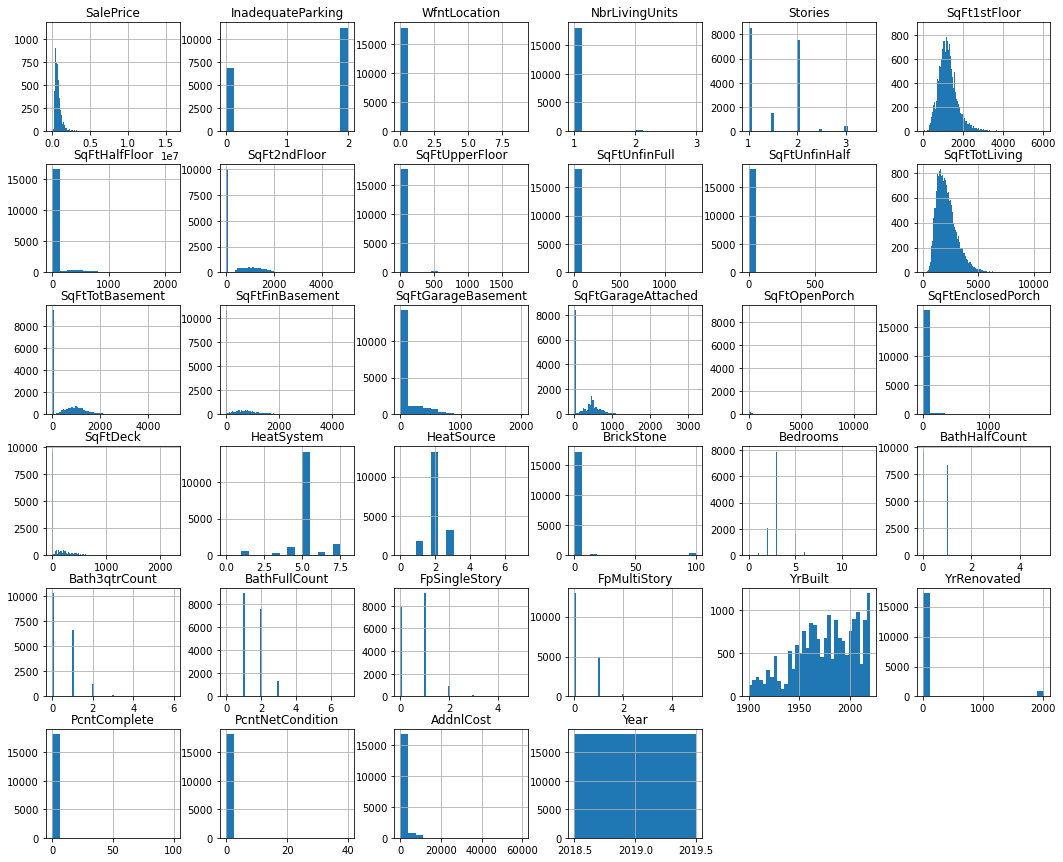

In [68]:
#histogram visualization
df.hist(figsize=(18,15), bins='auto');

## Data Understanding

### Creating Correlation Matrix

In [69]:
corr = df[['NbrLivingUnits','SqFt1stFloor', 'SqFtHalfFloor','SqFt2ndFloor',\
        'SqFtUpperFloor','SqFtUnfinFull','SqFtUnfinHalf','SqFtTotLiving',\
        'SqFtTotBasement','SqFtFinBasement','SqFtGarageBasement',\
        'SqFtGarageAttached','SqFtOpenPorch','SqFtEnclosedPorch','SqFtDeck',\
        'BrickStone','Bedrooms','BathHalfCount','Bath3qtrCount','BathFullCount',\
        'YrBuilt','YrRenovated','PcntComplete','PcntNetCondition','FpSingleStory',\
        'FpMultiStory','AddnlCost','InadequateParking',\
        'WfntLocation', 'HeatSystem', 'HeatSource']].corr()

In [70]:
df.describe()

,SalePrice,InadequateParking,WfntLocation,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,...,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,AddnlCost,Year
count,1.820400e+04,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,...,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.000000,18204.0
mean,7.963885e+05,1.242254,0.106460,1.009174,1.517936,1273.897715,45.805043,515.993078,13.101187,0.609207,...,0.516040,1.582399,0.635959,0.304494,1974.711767,99.314766,0.280048,0.005438,716.924687,2019.0
std,5.857649e+05,0.969730,0.869489,0.107272,0.534139,497.820409,167.657973,660.915454,88.743131,21.521462,...,0.656038,0.697875,0.632338,0.500134,30.400358,434.491312,4.799389,0.387583,2570.246493,0.0
min,1.000000e+01,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,2019.0
25%,4.729875e+05,0.000000,0.000000,1.000000,1.000000,960.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,1954.000000,0.000000,0.000000,0.000000,0.000000,2019.0
50%,6.599500e+05,2.000000,0.000000,1.000000,1.500000,1210.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1978.000000,0.000000,0.000000,0.000000,0.000000,2019.0
75%,9.090000e+05,2.000000,0.000000,1.000000,2.000000,1500.000000,0.000000,1020.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,1.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,2019.0
max,1.605000e+07,2.000000,9.000000,3.000000,3.500000,6070.000000,2160.000000,5110.000000,1800.000000,1350.000000,...,6.000000,7.000000,5.000000,5.000000,2020.000000,2020.000000,100.000000,40.000000,60000.000000,2019.0


In [71]:
corr = df.corr()
corr.SalePrice.sort_values(ascending=False)

SalePrice             1.000000
SqFtTotLiving         0.631196
SqFt1stFloor          0.408669
SqFt2ndFloor          0.384546
BathFullCount         0.325989
SqFtFinBasement       0.294116
Bedrooms              0.280973
SqFtOpenPorch         0.275442
SqFtTotBasement       0.272977
WfntLocation          0.254931
Stories               0.250855
Bath3qtrCount         0.236403
BathHalfCount         0.220754
SqFtDeck              0.211528
FpMultiStory          0.202460
SqFtGarageAttached    0.173845
FpSingleStory         0.164070
HeatSystem            0.138876
YrRenovated           0.118868
AddnlCost             0.102510
YrBuilt               0.087980
SqFtUpperFloor        0.077777
BrickStone            0.076252
SqFtHalfFloor         0.068598
SqFtGarageBasement    0.053397
InadequateParking     0.052289
PcntComplete          0.049068
NbrLivingUnits        0.010490
SqFtEnclosedPorch     0.008058
SqFtUnfinFull         0.004476
SqFtUnfinHalf         0.002723
PcntNetCondition     -0.008010
HeatSour

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

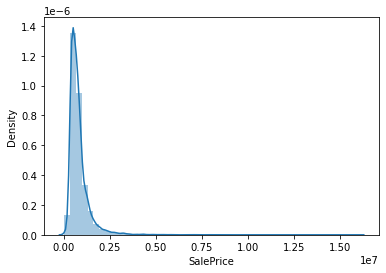

In [72]:
sns.distplot(df['SalePrice'])

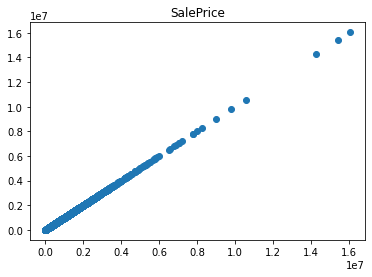

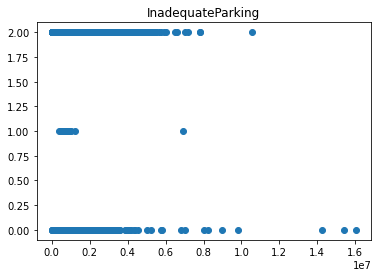

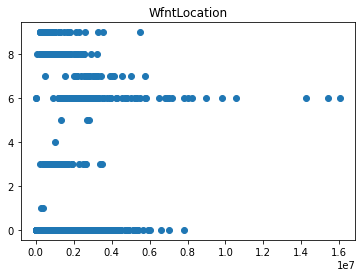

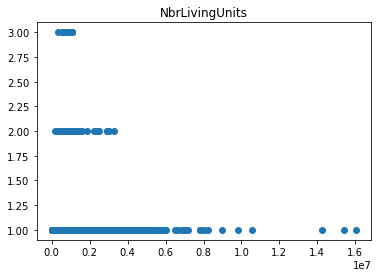

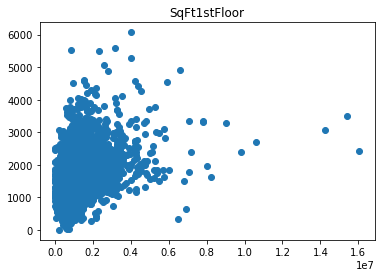

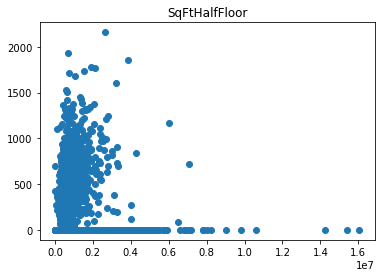

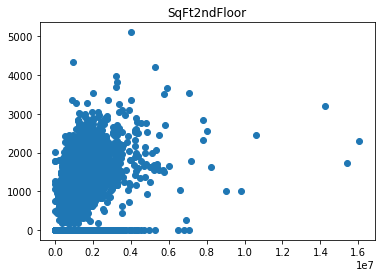

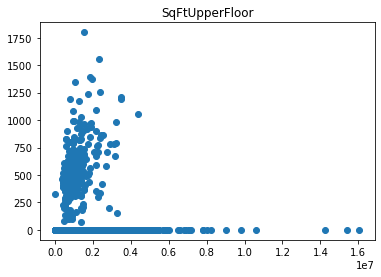

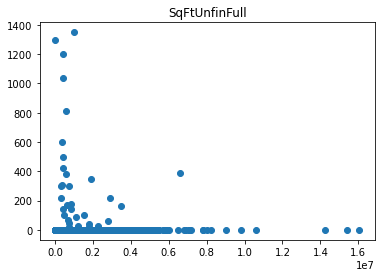

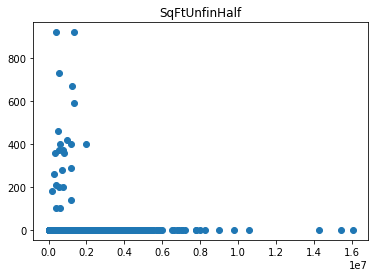

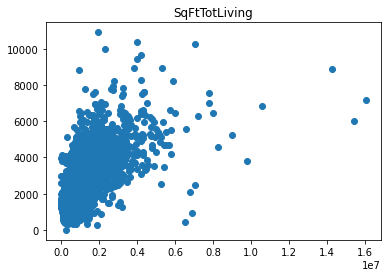

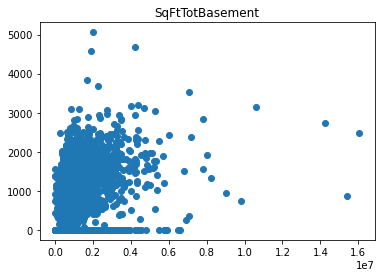

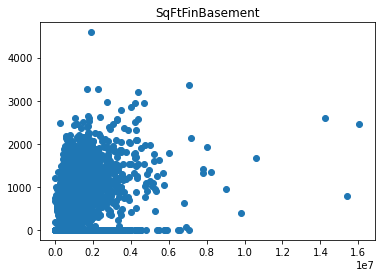

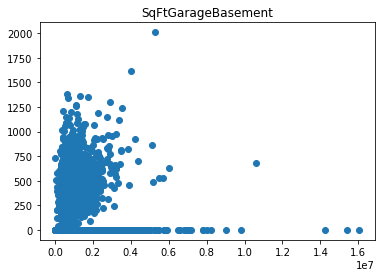

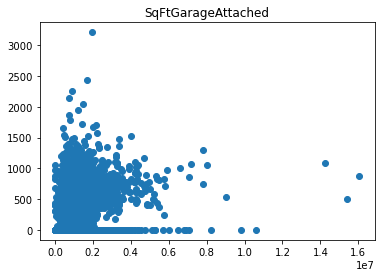

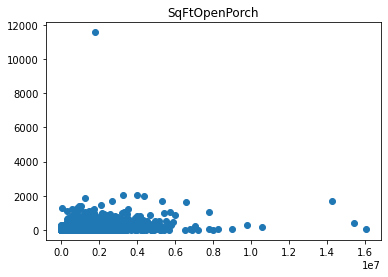

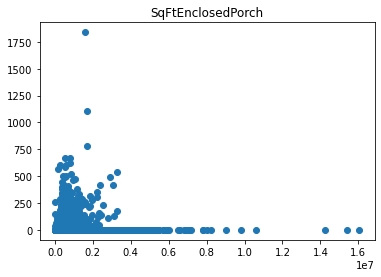

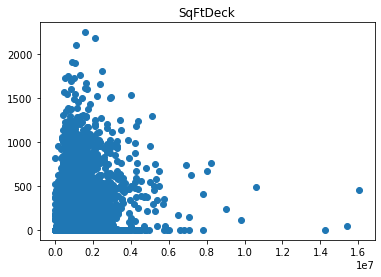

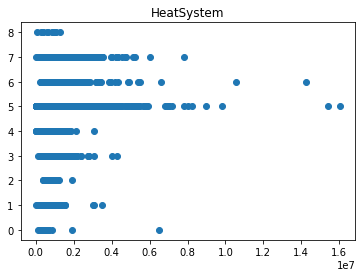

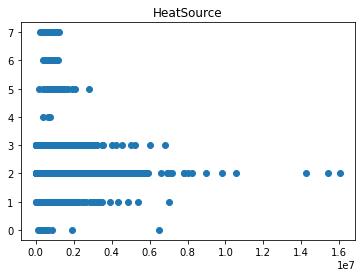

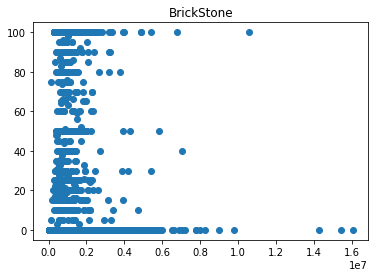

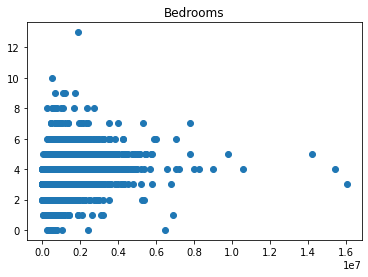

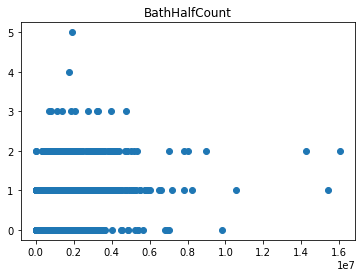

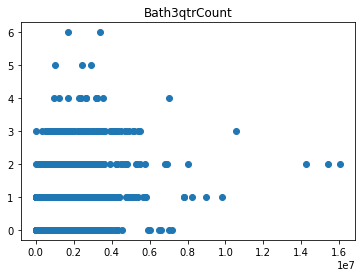

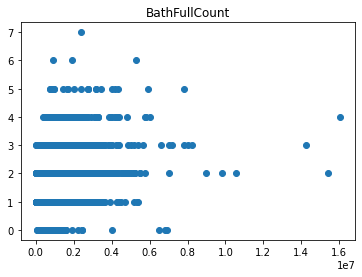

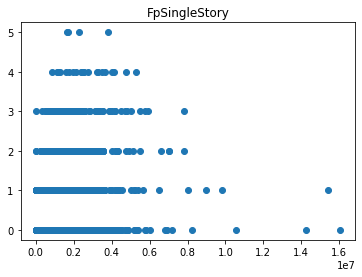

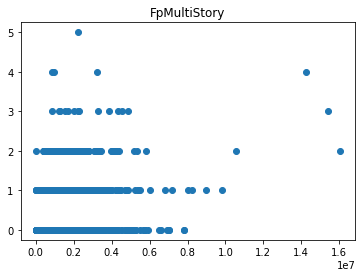

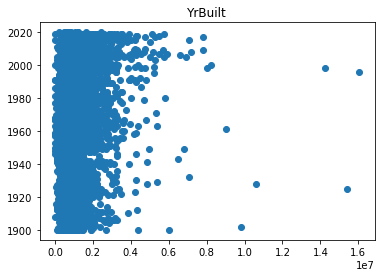

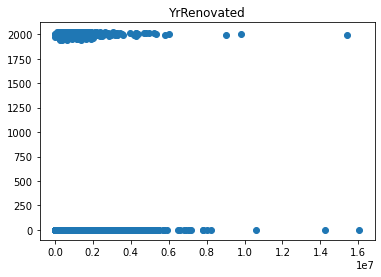

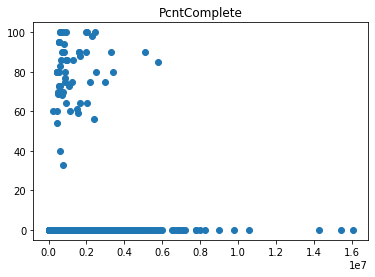

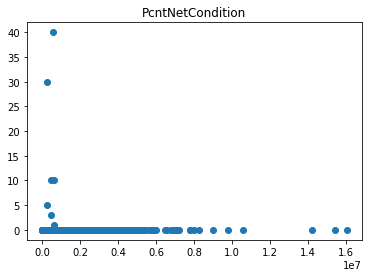

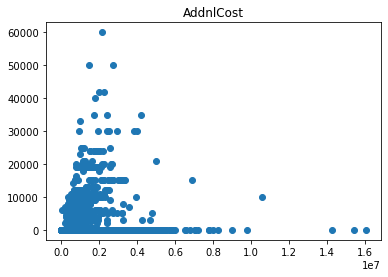

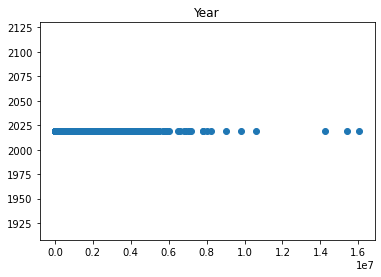

In [73]:
for col in df.columns:
    if df[col].dtype == 'int64':
        plt.scatter(df['SalePrice'], df[col])
        plt.title(col)
        plt.show()

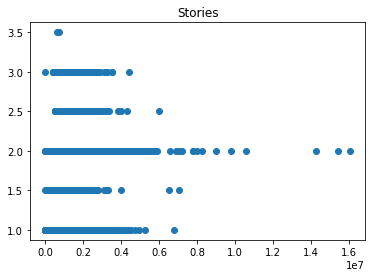

In [74]:
for col in df.columns:
    if df[col].dtype == 'float':
        plt.scatter(df['SalePrice'], df[col])
        plt.title(col)
        plt.show()

In [75]:
corr

,SalePrice,InadequateParking,WfntLocation,NbrLivingUnits,Stories,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,...,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,YrBuilt,YrRenovated,PcntComplete,PcntNetCondition,AddnlCost,Year
SalePrice,1.000000,0.052289,0.254931,0.010490,0.250855,0.408669,0.068598,0.384546,0.077777,0.004476,...,0.236403,0.325989,0.164070,0.202460,0.087980,0.118868,0.049068,-0.008010,0.102510,NaN
InadequateParking,0.052289,1.000000,-0.005896,0.016130,0.063891,-0.014914,0.031723,0.032583,0.052114,0.016750,...,0.011853,0.032845,0.029244,-0.032941,0.032559,0.013385,0.011910,-0.012714,-0.020347,NaN
WfntLocation,0.254931,-0.005896,1.000000,0.001897,0.010497,0.087875,0.010978,0.030406,0.003382,0.026126,...,0.056043,0.015691,0.014939,0.042433,-0.007882,0.050349,0.007428,-0.000251,0.014961,NaN
NbrLivingUnits,0.010490,0.016130,0.001897,1.000000,-0.005748,0.015799,0.043346,-0.014886,-0.005989,-0.002421,...,0.000641,0.073925,-0.039040,-0.009062,-0.086737,0.020548,-0.004990,-0.001200,-0.005724,NaN
Stories,0.250855,0.063891,0.010497,-0.005748,1.000000,-0.167841,0.029066,0.772264,0.410113,0.014796,...,-0.029001,0.408355,0.146037,-0.005535,0.524918,-0.023174,0.062523,-0.013607,0.161997,NaN
SqFt1stFloor,0.408669,-0.014914,0.087875,0.015799,-0.167841,1.000000,-0.005706,0.151887,-0.153386,0.038089,...,0.214110,0.272918,0.287985,0.160084,0.077451,0.062274,-0.014062,-0.013181,0.123245,NaN
SqFtHalfFloor,0.068598,0.031723,0.010978,0.043346,0.029066,-0.005706,1.000000,-0.174316,-0.038349,-0.004126,...,-0.003990,-0.025227,-0.070580,0.032112,-0.303119,0.048325,-0.010126,-0.003834,-0.020409,NaN
SqFt2ndFloor,0.384546,0.032583,0.030406,-0.014886,0.772264,0.151887,-0.174316,1.000000,0.078672,0.012257,...,0.003491,0.541399,0.304822,0.045804,0.573769,-0.039387,0.054502,-0.010955,0.234368,NaN
SqFtUpperFloor,0.077777,0.052114,0.003382,-0.005989,0.410113,-0.153386,-0.038349,0.078672,1.000000,0.010853,...,0.045307,0.052942,-0.018172,-0.061776,0.164505,-0.012150,0.032988,-0.002072,0.006990,NaN
SqFtUnfinFull,0.004476,0.016750,0.026126,-0.002421,0.014796,0.038089,-0.004126,0.012257,0.010853,1.000000,...,0.003802,-0.004970,0.013996,-0.014326,-0.003164,0.018931,-0.001652,-0.000397,0.001171,NaN


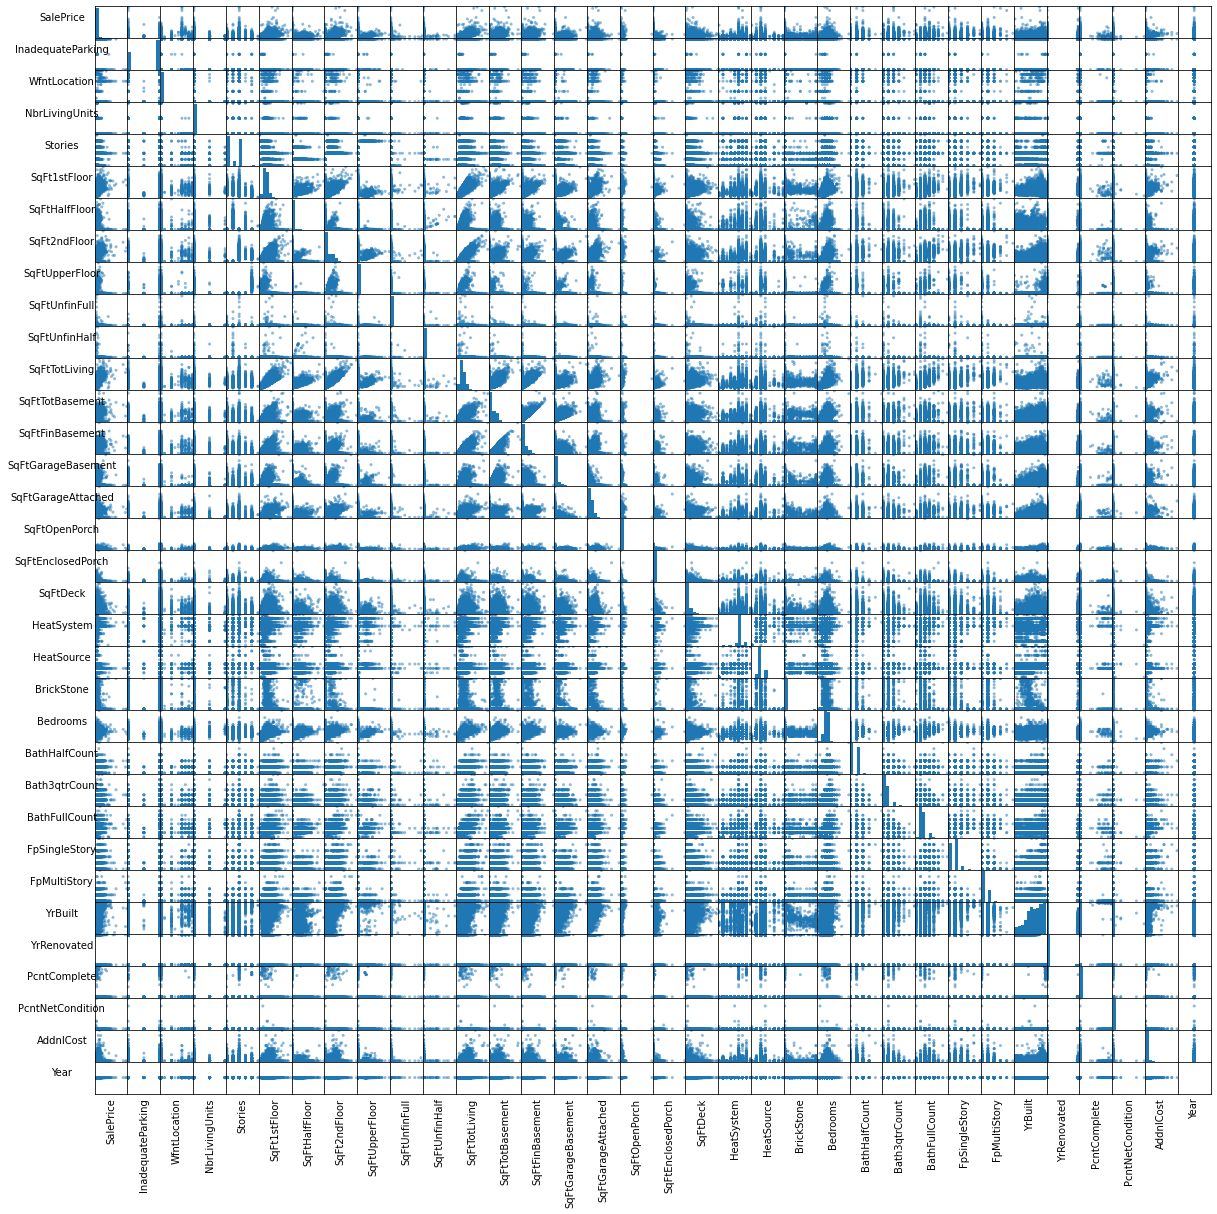

In [76]:
# create scatter plot for each column
sm = pd.plotting.scatter_matrix(df, figsize = [20, 20]);

# Rotates the text
[s.xaxis.label.set_rotation(90) for s in sm.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in sm.reshape(-1)]

#May need to offset label when rotating to prevent overlap of figure
[s.get_yaxis().set_label_coords(-1, 0.5) for s in sm.reshape(-1)]

#Hide all ticks
[s.set_xticks(()) for s in sm.reshape(-1)]
[s.set_yticks(()) for s in sm.reshape(-1)]

plt.show()

### Heatmap Features

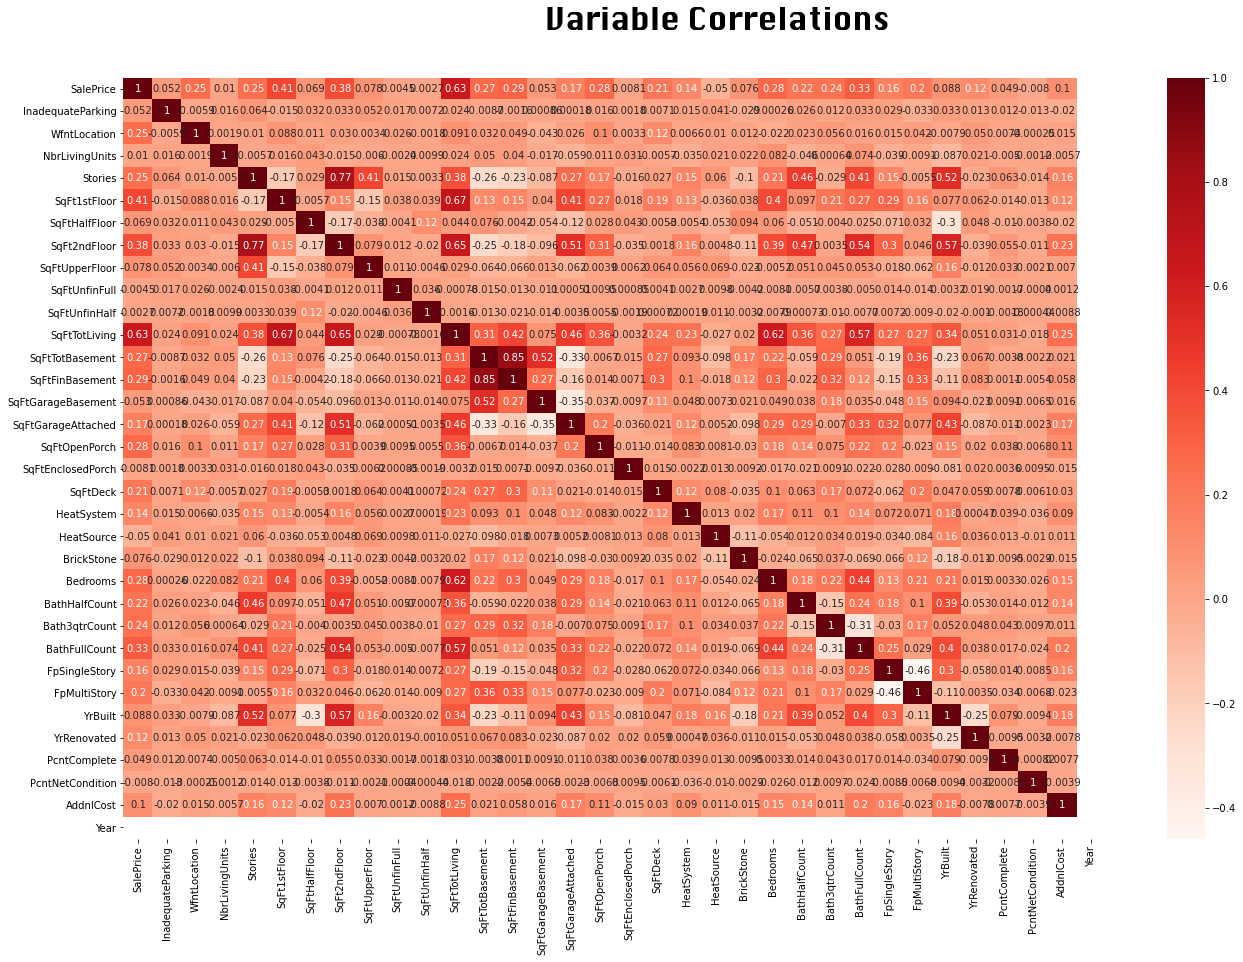

In [77]:
fig, ax = plt.subplots(figsize = (22, 14))
fig.suptitle('Variable Correlations', fontsize = 30, y = .95, fontname = 'Silom')
heatmap = sns.heatmap(corr, cmap = 'Reds', annot = True)
plt.savefig('../../reports/Model.png', dpi=100, bbox_inches='tight')

- From the above heatmap, the dark red color indicates that they are highly correlated with each other. 
- In this heatmap SalePrice is highly correlated to SqFtTotLiving.
- Saleprice is fairly correlated to SqFt1stFloor, SqFt2ndFloor, BathFullCount, SqFtFinBasement.

There are a lot of variables here! Let's look at a correlation matrix to see which ones might be the most useful. 

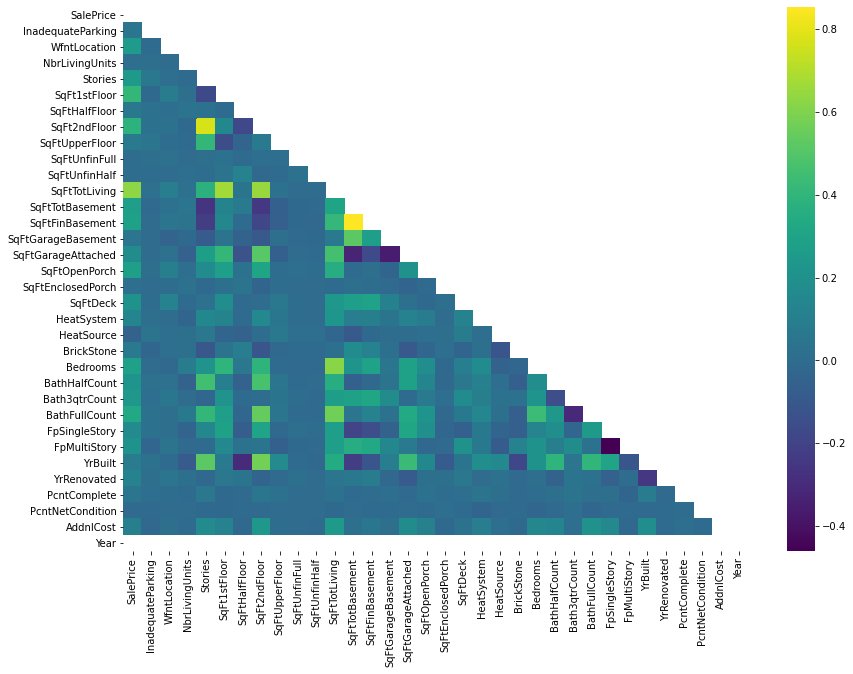

In [78]:
# The mask is not necessary, but corr() has duplicate values on either side of the diagonal
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig1, ax1 = plt.subplots(figsize=(14, 10))
sns.heatmap(corr, mask=mask, ax=ax1, cmap="viridis");
plt.savefig('../../reports/Model1.png', dpi=100, bbox_inches='tight')

It looks like there are many that are positively correlated with SalePrice. Let's make a pair plot of those.

<Figure size 432x288 with 0 Axes>

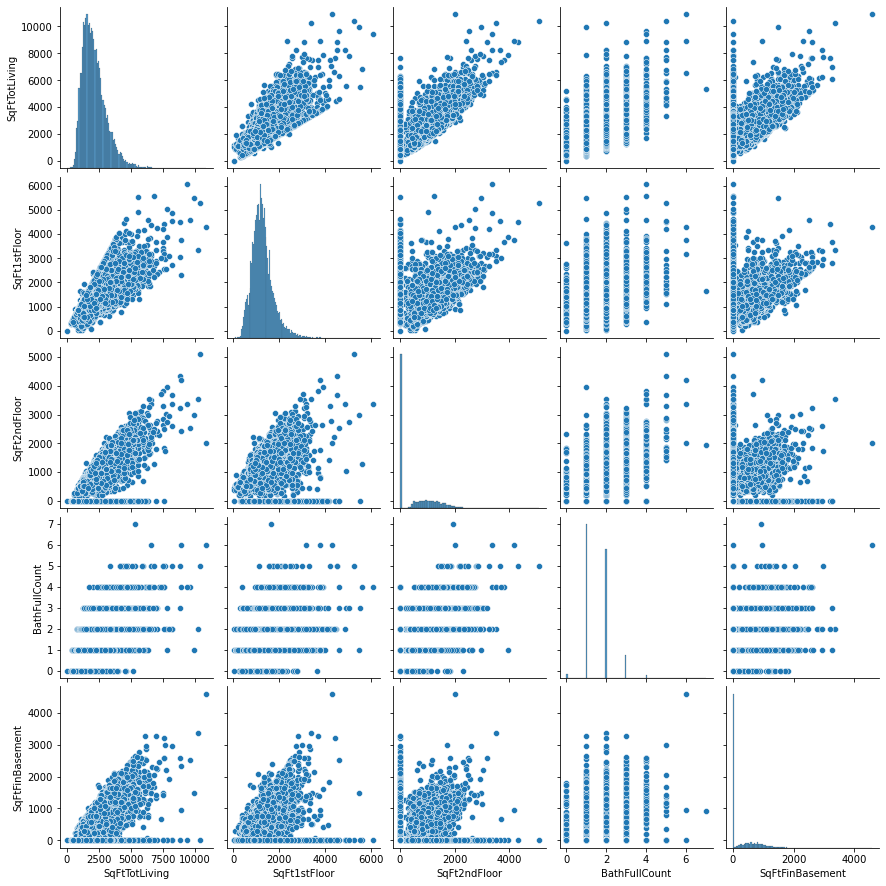

In [79]:
positively_correlated_cols = ['SqFtTotLiving','SqFt1stFloor', 'SqFt2ndFloor', 'BathFullCount', 'SqFtFinBasement']
positively_correlated_df = df[positively_correlated_cols]
plt.savefig('../../reports/Model2.png', dpi=100, bbox_inches='tight')
sns.pairplot(positively_correlated_df);

### Check for Linearity

 one assumption in linear regression is that the target variable is linearly related to the input features. 

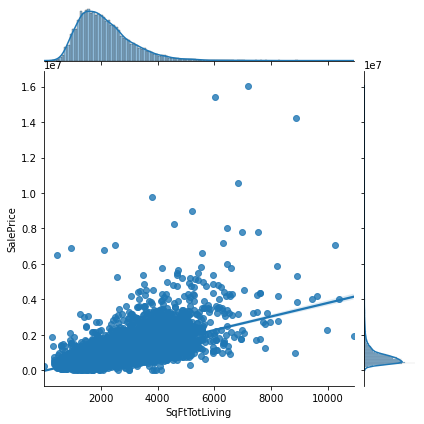

In [80]:
sns.jointplot('SqFtTotLiving', 'SalePrice', data=df, kind='reg');

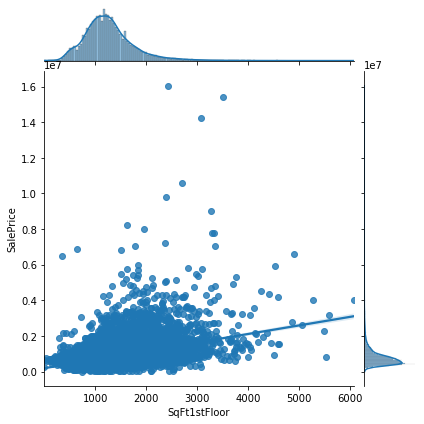

In [81]:
sns.jointplot('SqFt1stFloor', 'SalePrice', data=df, kind='reg');

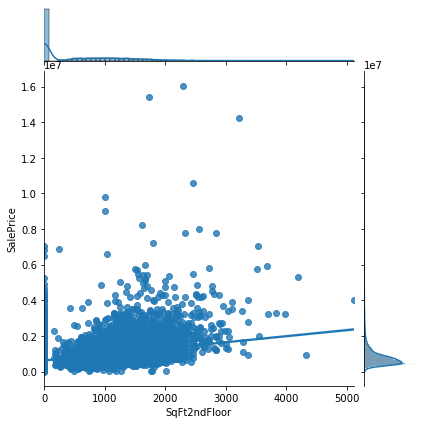

In [82]:
sns.jointplot('SqFt2ndFloor', 'SalePrice', data=df, kind='reg');

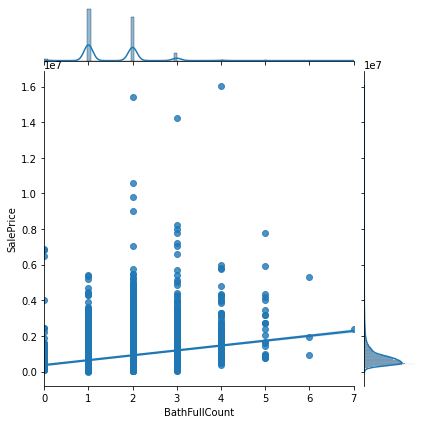

In [83]:
sns.jointplot('BathFullCount', 'SalePrice', data=df, kind='reg');

- Using seaborn's .jointplot() method,linearity between SqFtTotLiving and Saleprice are normally distributed. 
- linearity between SqFt1stFloor and Saleprice are both normally distributed. 
- Relation between SqFtTotLiving and Saleprice are linear with some outliers and are skewed right.
- Relation between BathFullCount and Saleprice are not normally distributed.

## Building a Linear Regression Model

## Model1

We could explore Linear regression for all variables vs. price to see how they affect saleprice individually (R squared) and also verify if the independent variables selected are statistically significant (p-value....the lower they are for the corresponding variables the more statistically significant they are).

Starting with the simple model. The targeted variable is SalePrice and i'm taking one independent variable which is highly correlated with Saleprice. Building a simple model.

In [84]:
fsm_df = df[['SalePrice', 'SqFtTotLiving']].copy()

In [85]:
fsm_df.isna().sum()

SalePrice        0
SqFtTotLiving    0
dtype: int64

In [86]:
# Fitting the actual model
fsm = ols(formula="SalePrice ~ SqFtTotLiving", data=fsm_df)
fsm_results = fsm.fit()

In [87]:
fsm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.398
Method:                 Least Squares   F-statistic:                 1.205e+04
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:28   Log-Likelihood:            -2.6297e+05
No. Observations:               18204   AIC:                         5.259e+05
Df Residuals:                   18202   BIC:                         5.260e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.765e+04   8226.230     -3.361      0.001   -4.38e+04   -1.15e+04
SqFtTotLiving   382.8579      3.487    109.793      0.000     376.023     389.693
==============================================================================
Omnibus:                    23583.917   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13528011.140
Skew:                           6.802   Prob(JB):                         0.00
Kurtosis:                     135.854   Cond. No.                     5.76e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- My first simple regression model tells that about 39.8% variance of SalePrice. I have used only one feature. 
- p-value for the Intercept is 0.001, which is considered statistically significant(<0.05).
- Coefficient for SqFtTotLiving has a p-value of 0.000 which is less than (0.05) and it is also satistically significant.
- This model predicts a saleprice of -27,650 USD when square feet to living is 0 sqft.
- With an increase in 1 sqft, the saleprice is expected to increase by 382.8579 USD.
- The condition number is large, 5.76e+03. This might indicate that there are strong multicollinearity or other numerical problems.

Before we move forward, let's also check for the assumptions of linear regression

### Checking for Normality

### Checking for Homoscedasticity

In [88]:
y = fsm_df["SalePrice"]
y_hat = fsm_results.predict()

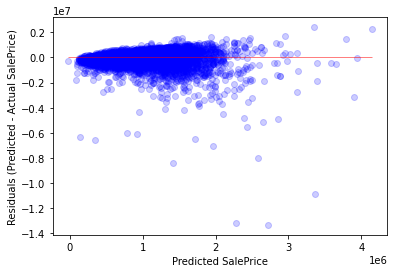

In [89]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted SalePrice",
        ylabel="Residuals (Predicted - Actual SalePrice)")
ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), color='red', lw=0.5)
ax.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);
plt.savefig('../../reports/Model3.png', dpi=200, bbox_inches='tight')

There appears to be some issues with high outliers displaying disproportionate errors

### Linearity: Rainbow Test

- H0: The null hypothesis is that the model is linearly predicted.
- Ha: The alternative hypothesis is that the model is not linearly predicted.

In [90]:
rainbow_statistic, rainbow_p_value = linear_rainbow(fsm_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0500027775731986
Rainbow p-value: 0.009976929903921038


- Thus returning a low p-value means that the current model violates the linearity assumption. 
- Since p-value(0.00997) is lower than (alpha=0.05 )value, we reject the null hypothesis.

### Normality: Jarque-Bera

- H0: The null hypothesis is that the residuals are normally distributed.
- Ha: Alternative hypothesis is that they are not normally distributed.

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).

The Jarque-Bera test p-value of 0.00 indicates that the residuals are not normally distributed and that the model violates an assumption of linear regression.

### Bruesch-Pagan Test

Let's run a statistical test

In [91]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, fsm_df[["SqFtTotLiving"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 1.9102517904299505e-84


Thus returning a low p-value of 1.9102517904299505e-84 means that the current model violates the homoscedasticity assumption

### Independence

The independence assumption means that the independent variables must not be too collinear. Right now we have only one independent variable, so we don't need to check this yet.

## Model2

### Log Transformation

Performing log transformation for both the targeted and predictor variables to see if we could improve the 
R-squared performance.

In [92]:
model2_df = df[['SalePrice', 'SqFtTotLiving']].copy()

Both SalePrice and SqFtTotLiving are right skewed, i'm applying log transformation for both the variables.

In [93]:
model2_df = np.log(model2_df)

In [94]:
model2_df.head()

,SalePrice,SqFtTotLiving
11,13.235692,7.565275
12,12.983101,7.588324
29,13.607256,7.625595
39,13.527762,7.450080
58,12.906692,7.215240


In [95]:
model2 = ols(formula="SalePrice ~ SqFtTotLiving", data=model2_df)
model2_results = model2.fit()

In [96]:
model2_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                     9710.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:28   Log-Likelihood:                -11177.
No. Observations:               18204   AIC:                         2.236e+04
Df Residuals:                   18202   BIC:                         2.237e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7610      0.058    134.686      0.000       7.648       7.874
SqFtTotLiving     0.7478      0.008     98.537      0.000       0.733       0.763
==============================================================================
Omnibus:                    12031.139   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1293584.041
Skew:                          -2.320   Prob(JB):                         0.00
Kurtosis:                      44.036   Cond. No.                         134.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Here the R-squared has decreased from 0.398 to 0.348
- coefficients are statistically significant.

### Linearity: Rainbow Test

- H0: The null hypothesis is that the model is linearly predicted.
- Ha: The alternative hypothesis is that the model is not linearly predicted.

In [97]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model2_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 0.8829555180562915
Rainbow p-value: 0.9999999985361507


- From the above test, our p-value(0.9999) is greater than (alpha=0.05) alpha value. 
- We fail to reject the null hypothesis.

### Normality: Jarque-Bera

- H0: The null hypothesis is that the residuals are normally distributed.
- Ha: Alternative hypothesis is that they are not normally distributed.

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).

The Jarque-Bera test p-value of 0.00 indicates that the residuals are not normally distributed and that the model violates an assumption of linear regression.

### Checking for Homoscedasticity

In [98]:
y = model2_df["SalePrice"]
y_hat = model2_results.predict()

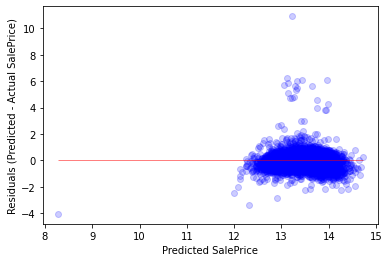

In [99]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted SalePrice",
        ylabel="Residuals (Predicted - Actual SalePrice)")
ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), color='red', lw=0.5)
ax.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);
plt.savefig('../../reports/Model4.png', dpi=200, bbox_inches='tight')

### Bruesch-Pagan Test

Let's run a statistical test

In [100]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, model2_df[["SqFtTotLiving"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 1.0955969349797107e-92


Thus returning a low p-value 1.0955969349797107e-92 means that the current model violates the homoscedasticity assumption

Since Model2 violates few assumptions, lets check the target and predictor(independent variable)

In [101]:
#checking for SalePrice
print(df['SalePrice'].describe())
# checking for SqFtTotLiving
df['SqFtTotLiving'].describe()

count    1.820400e+04
mean     7.963885e+05
std      5.857649e+05
min      1.000000e+01
25%      4.729875e+05
50%      6.599500e+05
75%      9.090000e+05
max      1.605000e+07
Name: SalePrice, dtype: float64


count    18204.000000
mean      2152.333169
std        965.717517
min          2.000000
25%       1460.000000
50%       1972.500000
75%       2640.000000
max      10910.000000
Name: SqFtTotLiving, dtype: float64

### Histogram Visualization

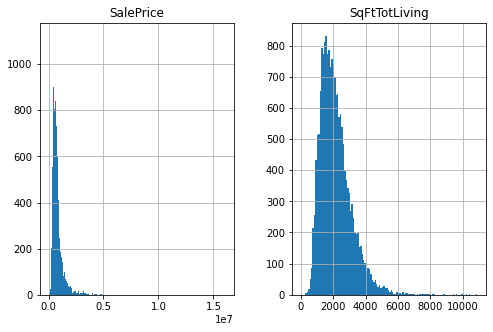

In [102]:
fsm_df.hist(figsize=(8,5), bins='auto');

There are extreme outliers to the right of the distribution.

### Boxplot

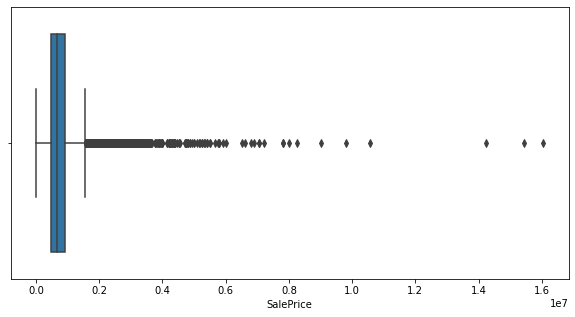

In [103]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=df['SalePrice']);

From the plot we can see the heavy presence of outliers on the right-hand side of the distribution.

### Removing Outliers

Let's remove the outliers and improve the coefficient of the results

In [104]:
# calculating Q1, Q3 and IQR
Q1 = df['SalePrice'].quantile(0.25)
Q3 = df['SalePrice'].quantile(0.75)
IQR = Q3 - Q1
IQR

436012.5

In [105]:
#Outliers can be removed from the data using statistical methods of IQR
df[((df['SalePrice'] < (Q1 - 1.5 * IQR))\
     | (df['SalePrice'] > (Q3 + 1.5 * IQR)))]['SalePrice'].describe()

count    1.177000e+03
mean     2.383146e+06
std      1.187459e+06
min      1.565000e+06
25%      1.739000e+06
50%      2.000000e+06
75%      2.595000e+06
max      1.605000e+07
Name: SalePrice, dtype: float64

In [106]:
M3 = df[~((df['SalePrice'] < (Q1 - 1.5 * IQR))\
                   | (df['SalePrice'] > (Q3 + 1.5 * IQR)))].copy()

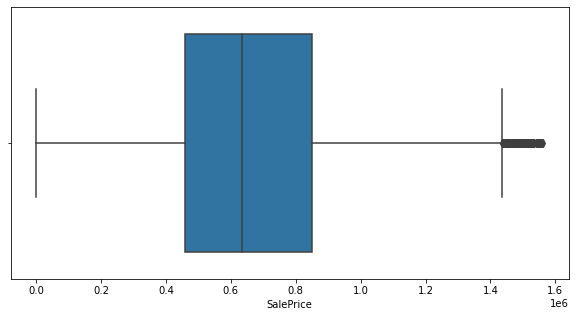

In [107]:
fig, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x=M3['SalePrice']);

Now the data seems to be symmetrically distributed.

In [108]:
from scipy import stats

df['SalePrice'] = stats.zscore(df['SalePrice'])
df['SalePrice']

11       -0.403566
12       -0.616968
29        0.026652
39       -0.079281
58       -0.671599
            ...   
251277    4.402248
251278    0.054190
251279   -0.685257
251286   -0.198700
251288    9.737299
Name: SalePrice, Length: 18204, dtype: float64

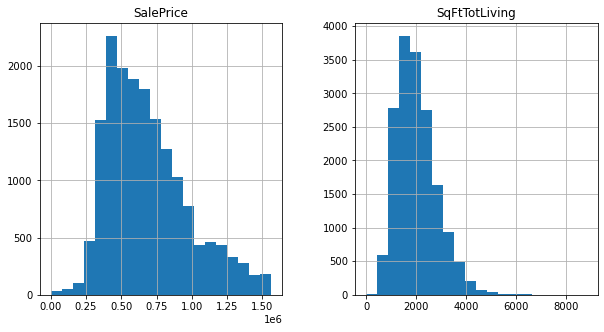

In [109]:
M3[['SalePrice', 'SqFtTotLiving']].hist(bins=20, figsize=(10,5));

## Model3

### Dropping Outliers

In [110]:
model3_df = M3[['SalePrice', 'SqFtTotLiving']].copy()

In [111]:
model3 = ols(formula="SalePrice ~ SqFtTotLiving", data=model3_df)
model3_results = model3.fit()

In [112]:
model3_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.313
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     7758.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:31   Log-Likelihood:            -2.3505e+05
No. Observations:               17027   AIC:                         4.701e+05
Df Residuals:                   17025   BIC:                         4.701e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2.803e+05   4964.870     56.461      0.000    2.71e+05     2.9e+05
SqFtTotLiving   200.4458      2.276     88.081      0.000     195.985     204.906
==============================================================================
Omnibus:                      810.599   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              944.301
Skew:                           0.538   Prob(JB):                    8.87e-206
Kurtosis:                       3.417   Cond. No.                     5.91e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- p-value is 0.000 which is less than alpha(0.05), we reject the null hypothesis.
- With an increase in 1 sqft, the saleprice is expected to increase by $200.44 
- p-value for the Intercept and Coefficient for SqFtTotLiving both are statistically significant.

### Linearity: Rainbow Test

In [113]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model3_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0089193413344915
Rainbow p-value: 0.34104042089596154


- From the above test, our p-value(0.3410) is greater than (alpha=0.05) alpha value.
- We fail to reject the null hypothesis.

### Normality: Jarque-Bera

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).



The Jarque-Bera test p-value of 8.87e-206 indicates that the residuals are not normally distributed and that the model violates an assumption of linear regression.



### Checking for Homoscedasticity

In [114]:
y = model3_df["SalePrice"]
y_hat = model3_results.predict()

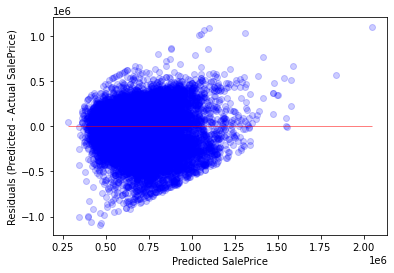

In [115]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted SalePrice",
        ylabel="Residuals (Predicted - Actual SalePrice)")
ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), color='red', lw=0.5)
plt.savefig('../../reports/Model5.png', dpi=200, bbox_inches='tight')
ax.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

### Bruesch-Pagan Test

In [116]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, model3_df[["SqFtTotLiving"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: nan
F-statistic p-value: 0.0


The p-value of 0.0 indicates that we must reject the null hypothesis

## Model4

### Square-Root Scaling 

In [117]:
model4_df = M3[['SalePrice', 'SqFtTotLiving']].copy()

In [118]:
model4_df['SqFtTotLiving_sqrt'] = np.sqrt(model4_df['SqFtTotLiving'])

In [119]:
model4_df.drop('SqFtTotLiving', axis=1, inplace=True)

In [120]:
model4_df.head()

,SalePrice,SqFtTotLiving_sqrt
11,560000,43.931765
12,435000,44.440972
29,812000,45.276926
39,749950,41.472883
58,403000,36.878178


In [121]:
model4 = ols(formula="SalePrice ~ SqFtTotLiving_sqrt", data=model4_df)
model4_results = model4.fit()

In [122]:
model4_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     7553.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:31   Log-Likelihood:            -2.3512e+05
No. Observations:               17027   AIC:                         4.702e+05
Df Residuals:                   17025   BIC:                         4.703e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.192e+05   9453.695    -12.606      0.000   -1.38e+05   -1.01e+05
SqFtTotLiving_sqrt  1.825e+04    209.958     86.910      0.000    1.78e+04    1.87e+04
==============================================================================
Omnibus:                      771.567   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              883.180
Skew:                           0.535   Prob(JB):                    1.66e-192
Kurtosis:                       3.314   Cond. No.                         231.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With an increase in 1 sqft, the saleprice is expected to increase by $1.825e+04

### Linearity: Rainbow Test

In [123]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model4_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0046805883696153
Rainbow p-value: 0.4147232242375807


From the above test, our p-value(0.4147) is greater than (alpha=0.05) alpha value.
We fail to reject the null hypothesis.

### Normality: Jarque-Bera

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).

The Jarque-Bera test p-value of 1.66e-192 indicates that the residuals are not normally distributed and that the model violates an assumption of linear regression.

### Checking for Homoscedasticity

In [124]:
y = model4_df["SalePrice"]
y_hat = model4_results.predict()

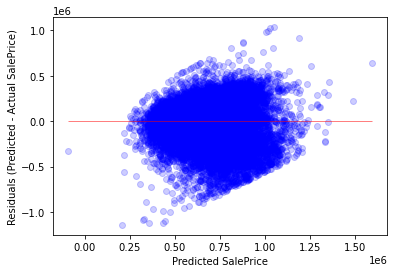

In [125]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted SalePrice",
        ylabel="Residuals (Predicted - Actual SalePrice)")
ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), color='red', lw=0.5)
plt.savefig('../../reports/Model6.png', dpi=200, bbox_inches='tight')
ax.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

## Model5

In model4 i'm adding a new predictor

In [126]:
model5_df = df[['SalePrice', 'SqFtTotLiving','SqFt1stFloor']].copy()

In [127]:
model5 = ols(formula="SalePrice ~ SqFtTotLiving + SqFt1stFloor", data=model5_df)
model5_results = model5.fit()

In [128]:
model5_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     6039.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:32   Log-Likelihood:                -21197.
No. Observations:               18204   AIC:                         4.240e+04
Df Residuals:                   18201   BIC:                         4.242e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.3749      0.016    -84.504      0.000      -1.407      -1.343
SqFtTotLiving     0.0007   8.05e-06     83.796      0.000       0.001       0.001
SqFt1stFloor  -6.059e-05   1.56e-05     -3.879      0.000   -9.12e-05      -3e-05
==============================================================================
Omnibus:                    23612.129   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13592679.588
Skew:                           6.817   Prob(JB):                         0.00
Kurtosis:                     136.171   Cond. No.                     7.65e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.65e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared value has increased from 0.313 to 0.399


### Linearity: Rainbow Test

In [129]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model5_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0486849371715166
Rainbow p-value: 0.011687277974163714


- From the above test, our p-value(0.01168) is lesser than (alpha=0.05) alpha value.
- We reject the null hypothesis.

### Normality: Jarque-Bera

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).

The Jarque-Bera test p-value of 0 indicates that the residuals are not normally distributed and that the model violates an assumption of linear regression.

### Checking for Homoscedasticity

In [130]:
y = model5_df["SalePrice"]
y_hat = model5_results.predict()

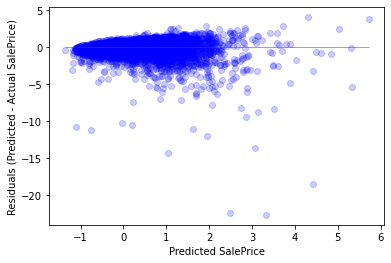

In [131]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted SalePrice",
        ylabel="Residuals (Predicted - Actual SalePrice)")
ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), color='red', lw=0.5)
plt.savefig('../../reports/Model7.png', dpi=200, bbox_inches='tight')
ax.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

### Bruesch-Pagan Test

In [132]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, model5_df[["SqFtTotLiving","SqFt1stFloor"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 2.1804902358611164e-93
F-statistic p-value: 4.895615288928722e-93


The p-value of 1.2150364300114772e-92 indicates that we must reject the null hypothesis

## Model6

Added additional predictors such as SqFt1stFloor, SqFt2ndFloor, BathFullCount

In [133]:
model6_df = df[['SalePrice', 'SqFtTotLiving','SqFt1stFloor','SqFt2ndFloor','BathFullCount']].copy()

In [134]:
model6 = ols(formula="SalePrice ~ SqFtTotLiving + SqFt1stFloor + SqFt2ndFloor + BathFullCount", data=model6_df)
model6_results = model6.fit()

In [135]:
model6_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     3074.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:32   Log-Likelihood:                -21132.
No. Observations:               18204   AIC:                         4.227e+04
Df Residuals:                   18199   BIC:                         4.231e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -1.3299      0.019    -71.586      0.000      -1.366      -1.293
SqFtTotLiving     0.0008   1.26e-05     62.020      0.000       0.001       0.001
SqFt1stFloor     -0.0002   1.82e-05     -8.650      0.000      -0.000      -0.000
SqFt2ndFloor     -0.0001   1.36e-05     -8.226      0.000      -0.000   -8.55e-05
BathFullCount    -0.0635      0.010     -6.106      0.000      -0.084      -0.043
==============================================================================
Omnibus:                    23549.869   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13534949.876
Skew:                           6.781   Prob(JB):                         0.00
Kurtosis:                     135.893   Cond. No.                     9.42e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- R-squared value has increased from 0.399 to 0.403

### Linearity: Rainbow Test

In [136]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model6_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0458299904175907
Rainbow p-value: 0.016293846194546827


From the above test, our p-value(0.01629) is lesser than (alpha=0.05) alpha value.
We reject the null hypothesis.

### Normality: Jarque-Bera

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).



The Jarque-Bera test p-value of 0 indicates that the residuals are not normally distributed and that the model violates an assumption of linear regression.



### Checking for Homoscedasticity

In [137]:
y = model6_df["SalePrice"]
y_hat = model6_results.predict()

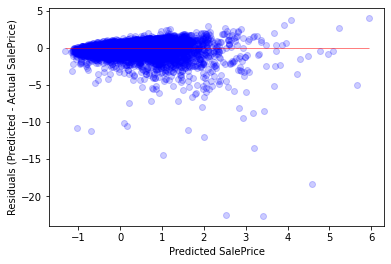

In [138]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted SalePrice",
        ylabel="Residuals (Predicted - Actual SalePrice)")
ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), color='red', lw=0.5)
plt.savefig('../../reports/Model8.png', dpi=200, bbox_inches='tight')
ax.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

### Bruesch-Pagan Test

In [139]:
lm, lm_p_value, fvalue, f_p_value = het_breuschpagan(y-y_hat, model6_df[["SqFtTotLiving","SqFt1stFloor","SqFt2ndFloor","BathFullCount"]])
print("Lagrange Multiplier p-value:", lm_p_value)
print("F-statistic p-value:", f_p_value)

Lagrange Multiplier p-value: 7.258506558385029e-113
F-statistic p-value: 2.4234237748607137e-113


The p-value of 2.4234237748706322e-113 indicates that we must reject the null hypothesis

### Independence: Variance Inflation Factor

In [140]:
rows = model6_df[['SqFtTotLiving','SqFt1stFloor','SqFt2ndFloor','BathFullCount']].values

vif_df = pd.DataFrame()
vif_df["VIF"] = [variance_inflation_factor(rows, i) for i in range(4)]
vif_df["feature"] = ['SqFtTotLiving','SqFt1stFloor','SqFt2ndFloor','BathFullCount']

vif_df


,VIF,feature
0,27.093141,SqFtTotLiving
1,16.190252,SqFt1stFloor
2,3.893015,SqFt2ndFloor
3,7.531948,BathFullCount


A "rule of thumb" for VIF is that 5 is too high, only for SqFt2ndFloor the VIF value is lower than 5, rest everything has higher variance inflation factor. There is strong multicollinearity.

## Model 7

### Adding Categorical Features

In [141]:
feat = ['InadequateParking', 'TrafficNoise', 'SqFtTotLiving', 'SqFt1stFloor']

In [142]:
categoricals = ['HeatSystem', 'HeatSource', 'Bedrooms', 'BldgGrade']
cat_ohe = df[categoricals]
encoder = OneHotEncoder(drop='first', sparse=False)
encoder.fit(cat_ohe)
cat_ohe = encoder.transform(cat_ohe)
cat_ohe = pd.DataFrame(cat_ohe, columns = encoder.get_feature_names())
cont = df[feat]
cat_ohe.reset_index(drop=True, inplace=True)
cont.reset_index(drop=True, inplace=True)
model7_df = pd.concat([cont, cat_ohe], axis=1)


In [143]:
model7_df.head()

,InadequateParking,TrafficNoise,SqFtTotLiving,SqFt1stFloor,x0_1,x0_2,x0_3,x0_4,x0_5,x0_6,...,x3_11,x3_12,x3_13,x3_3,x3_4,x3_5,x3_6,x3_7,x3_8,x3_9
0,0,0,1930,1930,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0,0,1975,1057,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,0,2050,1480,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0,0,1720,1050,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,0,1360,1360,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [144]:
model7_df.columns

Index(['InadequateParking', 'TrafficNoise', 'SqFtTotLiving', 'SqFt1stFloor',
       'x0_1', 'x0_2', 'x0_3', 'x0_4', 'x0_5', 'x0_6', 'x0_7', 'x0_8', 'x1_1',
       'x1_2', 'x1_3', 'x1_4', 'x1_5', 'x1_6', 'x1_7', 'x2_1', 'x2_2', 'x2_3',
       'x2_4', 'x2_5', 'x2_6', 'x2_7', 'x2_8', 'x2_9', 'x2_10', 'x2_13',
       'x3_10', 'x3_11', 'x3_12', 'x3_13', 'x3_3', 'x3_4', 'x3_5', 'x3_6',
       'x3_7', 'x3_8', 'x3_9'],
      dtype='object')

In [145]:
model7_df = df[['SalePrice','InadequateParking', 'TrafficNoise', 'SqFtTotLiving', 'SqFt1stFloor','HeatSystem', \
                'HeatSource', 'Bedrooms', 'BldgGrade']].copy()

In [146]:
model7 = ols(formula="SalePrice ~ InadequateParking + TrafficNoise + SqFtTotLiving +\
                      SqFt1stFloor + HeatSystem + HeatSource + Bedrooms + BldgGrade", data=model7_df)
model7_results = model7.fit()

In [147]:
model7_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.532
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     1032.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        12:39:33   Log-Likelihood:                -18924.
No. Observations:               18204   AIC:                         3.789e+04
Df Residuals:                   18183   BIC:                         3.805e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             1.8005      0.685      2.629      0.009       0.458       3.143
TrafficNoise[T.1]     0.0866      0.018      4.683      0.000       0.050       0.123
TrafficNoise[T.2]     0.0999      0.024      4.126      0.000       0.052       0.147
TrafficNoise[T.3]    -0.0074      0.062     -0.120      0.905      -0.128       0.113
BldgGrade[T.10]      -1.3097      0.686     -1.908      0.056      -2.655       0.036
BldgGrade[T.11]      -0.6002      0.687     -0.873      0.383      -1.948       0.747
BldgGrade[T.12]       0.6742      0.691      0.976      0.329      -0.679       2.028
BldgGrade[T.13]       5.6768      0.708      8.021      0.000       4.290       7.064
BldgGrade[T.3]       -2.5291      0.791     -3.199      0.001      -4.079      -0.979
BldgGrade[T.4]       -2.6253      0.709     -3.702      0.000      -4.015      -1.235
BldgGrade[T.5]       -2.4521      0.687     -3.568      0.000      -3.799      -1.105
BldgGrade[T.6]       -2.4243      0.686     -3.536      0.000      -3.768      -1.080
BldgGrade[T.7]       -2.3701      0.686     -3.457      0.001      -3.714      -1.026
BldgGrade[T.8]       -2.2434      0.686     -3.271      0.001      -3.588      -0.899
BldgGrade[T.9]       -1.8934      0.686     -2.760      0.006      -3.238      -0.549
InadequateParking     0.0308      0.005      5.865      0.000       0.021       0.041
SqFtTotLiving         0.0004   1.12e-05     37.362      0.000       0.000       0.000
SqFt1stFloor         -0.0001   1.41e-05     -8.746      0.000      -0.000   -9.56e-05
HeatSystem            0.0014      0.005      0.265      0.791      -0.009       0.012
HeatSource           -0.0769      0.009     -8.529      0.000      -0.095      -0.059
Bedrooms             -0.0811      0.007    -10.926      0.000      -0.096      -0.067
==============================================================================
Omnibus:                    19203.347   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5199308.602
Skew:                           4.802   Prob(JB):                         0.00
Kurtosis:                      85.234   Cond. No.                     1.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Linearity: Rainbow Test

In [148]:
rainbow_statistic, rainbow_p_value = linear_rainbow(model7_results)
print("Rainbow statistic:", rainbow_statistic)
print("Rainbow p-value:", rainbow_p_value)

Rainbow statistic: 1.0379807889146573
Rainbow p-value: 0.03777508411027295


From the above test, our p-value(0.03777) is lesser than (alpha=0.05) alpha value. We reject the null hypothesis.

### Normality: Jarque-Bera

The Jarque-Bera test is performed automatically as part of the model summary output, labeled Jarque-Bera (JB) and Prob(JB).

The Jarque-Bera test p-value of 0 indicates that the residuals are not normally distributed and that the model violates an assumption of linear regression.

### Checking for Homoscedasticity

In [149]:
y = model7_df["SalePrice"]
y_hat = model7_results.predict()

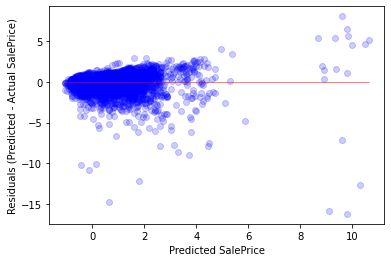

In [150]:
fig, ax = plt.subplots()
ax.set(xlabel="Predicted SalePrice",
        ylabel="Residuals (Predicted - Actual SalePrice)")
ax.hlines(y=0, xmin=y_hat.min(), xmax=y_hat.max(), color='red', lw=0.5)
plt.savefig('../../reports/Model9.png', dpi=200, bbox_inches='tight')
ax.scatter(x=y_hat, y=y_hat-y, color="blue", alpha=0.2);

- Adding categorical features, Model tells that about 53.2% variance of SalePrice.

### Visualization

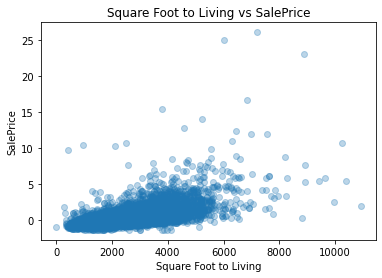

In [151]:
plt.scatter(x = df['SqFtTotLiving'], y = df['SalePrice'], alpha = 0.3)
plt.xlabel("Square Foot to Living")
plt.ylabel("SalePrice")
plt.title("Square Foot to Living vs SalePrice")
plt.savefig('../../reports/Model10.png', dpi=200, bbox_inches='tight')


The most distinctive feature is the square foot to living where the larger house will be more expensive. Living Square foot between 6000 - 8000 are expensive.

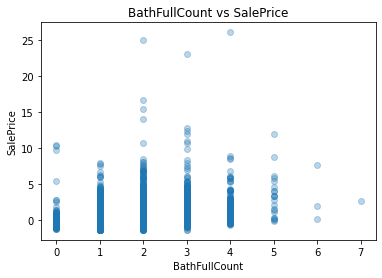

In [152]:
plt.scatter(x = df['BathFullCount'], y = df['SalePrice'], alpha = 0.3, label = 'Data Points')
plt.xlabel("BathFullCount")
plt.ylabel("SalePrice")
plt.title("BathFullCount vs SalePrice")
plt.savefig('../../reports/Model11.png', dpi=200, bbox_inches='tight')


From the above graph, it shows that the saleprice increases for 2 and 3 full bathroom counts. 

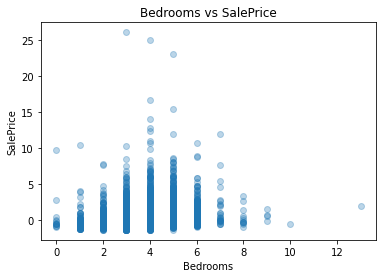

In [153]:
plt.scatter(x = df['Bedrooms'], y = df['SalePrice'], alpha = 0.3, label = 'Data Points')
plt.xlabel("Bedrooms")
plt.ylabel("SalePrice")
plt.title("Bedrooms vs SalePrice")
plt.savefig('../../reports/Model12.png', dpi=200, bbox_inches='tight')

From the above graph it shows that saleprice has increased for 4 and 5 Bedrooms.

## Conclusion

Home buyers in this market who are looking to maximize their dollars should carefully consider the locations in which they search. This will make the biggest impact on how far their budget will go. The second most important factor in housing is the square footage of the house.

This model can account for 53.2% of the variability in house prices in King County, which is a 10% increase from my initial model. I think the model is a decent start, but could be improved by doing more to work out the best transformation method for each feature.

- Selected important features and rejected the ones that can negatively impact result of the prediction.

- When i performed log tranformation there was a drop in R-squared value. 

- Similarly when i removed outliers, there was a statistically significant p-value.

- When i performed square root scaling, the p-value was larger than alpha value.

- After cleaning and modifying our data, Model 7 has given the satisfactory result and considering it as a final model with 53.2% variance of Saleprice. 

## Next Step

- The model has some limitations to satisfy regression assumptions.

- Our model has multicollinear relationship between the variables. Hence futher processing needs to be done on removing the multicollinearity.

- Stepwise selection can be done to further narrow the feature of the model.

